In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
try:
    import filterpy
    import geopy
except ImportError:
    !pip install filterpy
    !pip install geopy
from filterpy.kalman import KalmanFilter, EnsembleKalmanFilter, UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise, Saver
import loggings
logging.getLogger('matplotlib').setLevel(logging.WARNING)
plt.rcParams.update({'figure.max_open_warning': 0})

pd.set_option("display.max_columns", 500)

import warnings

warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'loggings'

In [4]:
# data = pd.read_csv('https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv')

In [2]:
path = "https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv"

stringency = pd.read_csv(path, parse_dates = ['DATE'])

# stringency['country_name'] = stringency['country_name'].apply(lambda z : z.upper()) 

stringency.head()

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166


In [977]:
stringency[stringency['ISO']=='BEL']

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
1969,BEL,2020-01-01,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-34.0,-70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-23.628571,NaN,2.953516e-07,0.004041,38.488944,1.936105,-0.084865,4.443646,2.704259
1970,BEL,2020-01-02,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-33.0,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-23.628571,NaN,2.111448e-06,0.004710,17.687699,3.924154,1.106208,7.465180,4.447062
1971,BEL,2020-01-03,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-32.0,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-23.628571,NaN,4.874654e-05,0.006116,13.096610,7.901739,5.249843,9.842861,6.270486
1972,BEL,2020-01-04,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-31.0,-67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-23.628571,NaN,3.227000e-06,0.004841,30.899286,5.135372,3.284922,6.987158,4.558841
1973,BEL,2020-01-05,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-30.0,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-23.628571,-165.4,1.885450e-06,0.004999,20.599938,5.640362,3.653823,7.129652,3.055893
1974,BEL,2020-01-06,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-29.0,-65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-7.371429,NaN,8.618761e-06,0.004428,44.755298,4.991296,3.418925,7.032064,4.348017
1975,BEL,2020-01-07,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11589616.0,375.564,41.8,42658.576,-28.0,-64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2,28.2,3081719.0,1550783.0,-7.371429,NaN,5.799079e-06,0

### Test condition

In [132]:
# region name or None for country-level aggregation
region = None # 'Flanders', 'Brussels', 'Wallonia' or None
# date range to be used (must match with '%m-%d' format)
date_range = None
# date_range = ['03-15', '05-09'] # if date_range is None, use all dates
# interpolate cases and tests values during the weekends?
interpolate_weekend = False

### Load data

In [130]:
data_file = 'https://epistat.sciensano.be/Data/COVID19BE.xlsx'
#data_file = 'data/Belgium/COVID19BE.xlsx'
xls = pd.ExcelFile(data_file)
df_hosp = pd.read_excel(xls, 'HOSP')
df_hosp.columns = map(str.lower, df_hosp.columns)
if region:
    df_hosp = df_hosp[df_hosp.region == region]
df_hosp.date = pd.to_datetime(df_hosp.date, format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df_hosp = df_hosp.sort_values('date').set_index('date')
df_hosp = df_hosp.groupby('date').sum()

In [131]:
df_hosp.head()

,nr_reporting,total_in,total_in_icu,total_in_resp,total_in_ecmo,new_in,new_out
date,,,,,,,
2020-03-15,104,266,54,32,1,71,18
2020-03-16,104,370,79,51,1,90,14
2020-03-17,105,497,100,66,3,122,31
2020-03-18,104,650,131,88,4,179,48
2020-03-19,106,844,165,115,4,207,49


### Select dates of interest

In [4]:
# default is without year. if year is required, make sure to modify accordingly.
if date_range:
    if date_range[0] is None:
        date_range[0] = '00-00'
    if date_range[1] is None:
        date_range[1] = '99-99'
    df_hosp = df_hosp[(df_hosp.index >= date_range[0]) & (df_hosp.index <= date_range[1])]

In [27]:
df_hosp.index.max()

'2020-06-26'

### Interpolate weekends if needed

In [28]:
def interpolate_weekend(x, col, first_friday):
    print('Interpolate for %s (Fri, Sat, Sun, Mon)' % col)
    first_friday_index = np.flatnonzero((x.index==first_friday))[0]
    for i in range(first_friday_index, x.shape[0]-3, 7):
        delta = (x.loc[x.index[i+3], col] - x.loc[x.index[i], col]) / 3
        value_sat = x.loc[x.index[i], col] + delta
        value_sun = value_sat + delta
#         print('[%s:%s] %7.1f, %7.1f > %-7.1f, %7.1f > %-7.1f, %7.1f' % (x.index[i], x.index[i+3],\
#             x.loc[x.index[i], col], x.loc[x.index[i+1], col], value_sat, x.loc[x.index[i+2], col], value_sun, x.loc[x.index[i+3], col]))
        x.loc[x.index[i+1], col] = value_sat
        x.loc[x.index[i+2], col] = value_sun
        return x

if interpolate_weekend is True:
    first_friday = '0320'
    interpolate_weekend(df_case, 'cases', first_friday)
    interpolate_weekend(df_case, 'vul_count', first_friday)
    interpolate_weekend(df_test, 'tests', first_friday)

    # recalculate vul_ratio after interpolation
    df_case['vul_ratio'] = df_case.vul_count / df_case.cases

### Kalman filter models

In [34]:
def kalman_predictor(initial_state, kf_p, kf_r, kf_q, kf_a):
    """
    We model Covid development as a dynamical system composed of 3 components:
    - measurement (observable) = case count,
    - speed (latent) = growth rate (cases per day)
    - acceleration (latent) = growth acceleration (cases per day^2)    
    - used params of kf_p=0, kf_r=10, kf_q=20
    """
    # day is our observation interval
    dt = 1
    # transition matrix (x:measurement, v:growth rate, a:growth acceleration)
    F = np.array([[1, dt, 0.5*(dt**2)], # x_new           = x_old + v*dt + 1/2*a*dt^2
                    [0, 1, dt],           # d(v_new) / dt   = v     + a*dt + 0
                    [0, 0, 1]])           # d(x_new) / dt^2 = 0     + 0    + a
    '''
    F = np.array([[1, dt, (dt**2)/2, (dt**3)/6], # x_new = x_old + v*dt + 1/2*a*dt^2 + 1/6*j*dt^3
                  [0, 1, dt, (dt**2)/2],         # d(x_new) / dt = v + a*dt + 1/2*j*dt^2
                  [0, 0, 1, dt],                 # d(v_new) / dt = a + jt
                  [0, 0, 0, 1]])                 # d(a_new) / dt = j
    '''
    # define a linear KF with position, velocity, acceleration parameters
    dim_x = F.shape[0]
    kf = KalmanFilter(dim_x=dim_x, dim_z=1)
    kf.F = F
    # state vector: initial position, velocity, acceleration
    kf.x = np.zeros(dim_x)
    kf.x[0] = initial_state
    # measuremnet matrix: can only directly measure case counts, not velocity & acceleration
    kf.H = np.zeros((1, dim_x))
    kf.H[0][0] = 1
    # covariance matrix
    kf.P *= kf_p
    # measurement noise
    kf.R = kf_r
    # process noise
    kf.Q = Q_discrete_white_noise(dim=dim_x, dt=1, var=kf_q)
    # fading factor
    kf.alpha = kf_a
    return kf

def ensemble_kalman_predictor(initial_state, kf_p, kf_r, kf_q, kf_n):
    """
    We model Covid development as a dynamical system composed of 3 components:
    - measurement (observable) = case count,
    - speed (latent) = growth rate (cases per day)
    - acceleration (latent) = growth acceleration (cases per day^2)
    """
    # day is our observation interval
    dt = 1
    # transition matrix (x:measurement, v:growth rate, a:growth acceleration)
    F = np.array([[1, dt, (dt**2)/2], # x_new           = x_old + v*dt + 1/2*a*dt^2
                  [0, 1, dt],           # d(x_new) / dt   = v     + a*dt + 0
                  [0, 0, 1]])           # d(x_new) / dt^2 = 0     + 0    + a
    ''' also consider jerk
    F = np.array([[1, dt, (dt**2)/2, (dt**3)/6], # x_new = x_old + v*dt + 1/2*a*dt^2 + 1/6*j*dt^3
                  [0, 1, dt, (dt**2)/2],         # d(x_new) / dt = v + a*dt + 1/2*j*dt^2
                  [0, 0, 1, dt],                 # d(v_new) / dt = a + jt
                  [0, 0, 0, 1]])                 # d(a_new) / dt = j
    '''
    # state vector: initial position, velocity, acceleration
    X0 = np.zeros(F.shape[0])
    X0[0] = initial_state
    # transition function
    Fx = lambda x, dt: np.dot(F, x)
    # measuremnet function
    Hx = lambda x: np.array([x[0]])
    # covariance matrix
    P = np.eye(F.shape[0]) * kf_p
    # measurement noise
    R = kf_r
    # process noise
    Q = Q_discrete_white_noise(dim=F.shape[0], dt=1, var=kf_q)
    # let's make it
    kf = EnsembleKalmanFilter(x=X0, P=P, dim_z=1, dt=1, N=kf_n, hx=Hx, fx=Fx)
    kf.R = R
    kf.Q = Q
    return kf

### Forecast using Kalman filter

In [35]:
def kalman_forecast(series, days, kf_type, params):
    """
    Forecast based on history data.
    
    Input
    -----
    series: Pandas Series object with dates being index in ascending order.
    days: Prediction window length
    kf_type: linear, unscented, ensemble
    kf_*: Parameters for Kalman filter. Default values work reasonably well on several countries.
    
    Output
    ------
    Pandas DataFrame object with the following columns
    pred_raw: Raw prediction
    pred: Final prediction (with smoothing, etc.)
    ci_*: Lower and upper bounds of CI
    """
    if days <= 0:
        raise ValueError
    dates = series.index
    if kf_type == 'linear':
        if params is None:
            params = {'kf_p':1, 'kf_r':4, 'kf_q':0.1, 'kf_a':1}
        if params['kf_a'] < 1:
            raise ValueError
        kf = kalman_predictor(series[dates[0]], params['kf_p'], params['kf_r'], params['kf_q'], params['kf_a'])
    elif kf_type == 'ensemble':
        if params is None:
            params = {'kf_p':100, 'kf_r':1000, 'kf_q':0.1, 'kf_n':1000}
        kf = ensemble_kalman_predictor(series[dates[0]], params['kf_p'], params['kf_r'], params['kf_q'], params['kf_n'])
    else:
        raise NotImplementedError
    
    # fit model
    for measurement in series:
        kf.predict()
        kf.update([measurement])
    
    # start forecasting, starting from the last observation date
    
    if isinstance(dates[-1], str):
        
         last_date = dt.datetime.strptime(dates[-1], '%Y-%m-%d')
            
    else:
        
        last_date = dates[-1]
        
    predictions = []
    pred_acc = []
    pred_vel = []
    pred_dates = []
    ci_bounds = []
    for day in range(days):
        future_date = (last_date + dt.timedelta(days=day+1))
        pred_dates.append(future_date)
        kf.predict()
        predictions.append(kf.x[0])
        pred_acc.append(kf.x[2])
        pred_vel.append(kf.x[1])
        ci_bounds.append(kf_ci_bound(kf))
    
    # smoothen and add confidence intervals
    predictions = np.array(predictions)
    predictions[np.where(predictions < 0)[0]] = 0
    #smooth_buffer = list(series[dates[len(dates)-days+1:]])
    #predictions_smooth = smoother(smooth_buffer + predictions, days)[days-1:]
    predictions_smooth = smoother(predictions, days)
    ci_bounds = np.array(ci_bounds)
    ci_upper = predictions_smooth + ci_bounds
    ci_lower = predictions_smooth - ci_bounds
    ci_lower[np.where(ci_lower < 0)[0]] = 0
    
    df_pred = pd.DataFrame({'pred_raw':predictions, 'pred':predictions_smooth, 'pred_vel': pred_vel, 
                          'pred_acc': pred_acc, 'ci_lower':ci_lower, 'ci_upper':ci_upper}, index=pred_dates)
    return df_pred

def kf_ci_bound(kf):
    """
    Compute 95% confidence interval from KF's positive semi-definite covariance matrix
    
    returns a positive single-sided boundary (half) of the interval
    -> CI = kf.x[0] +- kf_ci_bound(kf)
    """
    return 1.96 * (np.diag(kf.P)[0])**0.5

def smoother(x, winsize, method = 'slide'):
    if method == 'slide':
        x_smooth = []
        for i in range(len(x)):
            x_smooth.append(np.mean(x[max(0, i-winsize+1):i+1]))
    elif method == 'slide_recurse':
        x_smooth = predictions.copy()
        for i in range(len(x)):
            x_smooth[i] = np.mean(x_smooth[max(0, i-winsize):i+1])
    else:
        raise NotImplementedError
    assert(len(x) == len(x_smooth))
    return np.array(x_smooth)

### Helpers

In [4]:
def get_stats(observations, predictions):
    r2 = r2_score(observations, predictions)
    mae = mean_absolute_error(observations, predictions)
    rmse = mean_squared_error(observations, predictions) ** 0.5
    return r2, mae, rmse

def rescale(df_x):
    x = df_x.copy()
    x -= x.min()
    x /= x.max()
    return x

### Performance testing and debugging

In [5]:
def kalman_test(series, winsize, kf_type, params=None):
    """
    To test the performance compared with true values along all data points
    
    Input
    -----
    series: Pandas Series object with dates being index in ascending order.
    winsize: Prediction window size in number of days.
    kf_type: linear, unscented, ensemble
    kf_*: factors for Kalman filter. Default values work reasonably well.
          For long-term prediction, usually increasing the fading factor (kf_a) helps.
    
    Output
    ------
    Pandas DataFrame object with the following columns
    pred_raw: Raw prediction
    pred: Final prediction (with smoothing, etc.)
    obs: Ground-truth values
    history: recursive prediction history at each time point (for debugging purpose)
    """
    if winsize <= 0:
        raise ValueError
    observations = []
    predictions = []
    predictions_acc = []
    predictions_vel = []
    pred_dates = []
    history = []
    ci_bounds = []
    dates = series.index.to_numpy()
    if kf_type == 'linear':
        if params is None:
            params = {'kf_p':1, 'kf_r':4, 'kf_q':0.1, 'kf_a':1}
        if params['kf_a'] < 1:
            raise ValueError
        kf = kalman_predictor(series[dates[0]], kf_type, params['kf_p'], params['kf_r'], params['kf_q'], params['kf_a'])
    elif kf_type == 'ensemble':
        if params is None:
            params = {'kf_p':100, 'kf_r':1000, 'kf_q':0.1, 'kf_n':1000}
        kf = ensemble_kalman_predictor(series[dates[0]], params['kf_p'], params['kf_r'], params['kf_q'], params['kf_n'])
    else:
        raise NotImplementedError(kf_type)
    
    for i in range(dates.shape[0]-winsize):
        # save the current state of the model
        saver = Saver(kf, skip_callable=True, save_current=True)
        
        # recursive prediction
        history_window = [kf.x[0]]
        date_window = [dates[i]]
        for day in range(winsize):
            kf.predict()
            history_window.append(kf.x[0])
            date_window.append(dates[i+day+1])
        history.append(pd.DataFrame({'pred':history_window}, index=date_window))
        pred_date = dates[i+winsize]
        pred_dates.append(pred_date)
        prediction = kf.x[0]
        predictions.append(prediction)
        predictions_vel.append(kf.x[1])
        predictions_acc.append(kf.x[2])
        observation = series[pred_date]
        observations.append(observation)
        ci_bounds.append(kf_ci_bound(kf))
        
        # restore model states and update to next day
        for attr in saver.keys:
            try:
                setattr(kf, attr, getattr(saver, attr)[-1])
            except AttributeError: # property decoration causes problem
                #print('.%s skip' % attr)
                continue
        kf.predict() ## is this predict call necessary at all?
        kf.update([series[dates[i+1]]])
    
    # smoothen output
    predictions_smooth = smoother(predictions, winsize)
    predictions_smooth[predictions_smooth < 0] = 0
    #acc_smooth = smoother(predictions_acc, winsize)
    #vel_smooth = smoother(predictions_vel, winsize)
    acc_smooth = predictions_acc
    vel_smooth = predictions_vel
    ci_bounds = np.array(ci_bounds)
    ci_lower = predictions_smooth - ci_bounds
    ci_upper = predictions_smooth + ci_bounds
    ci_lower[np.where(ci_lower < 0)[0]] = 0
    df_pred = pd.DataFrame({'pred_raw':predictions[winsize:], 'pred':predictions_smooth[winsize:],
                          'obs':observations[winsize:], 'history':history[winsize:],
                          'ci_lower':ci_lower[winsize:], 'ci_upper':ci_upper[winsize:],
                          'pred_acc':acc_smooth[winsize:], 'pred_vel':vel_smooth[winsize:]},
                           index=pred_dates[winsize:])
    return df_pred

### Predict + plot functions

In [6]:
def test_plot(series, winsize, kf_type, params=None, title='', y_lims=None):
    """
    Make a prediction and plot at once for convenience.
    
    """
    PLOT_RAW = True
    SHOW_TRAJECTORY = True
    DO_FORECAST = True
    
    result = kalman_test(series, winsize, kf_type, params)
    
    if DO_FORECAST:
        forecast = kalman_forecast(series, winsize, kf_type, params)
    
    r2, mae, rmse = get_stats(result.obs, result.pred)
    #r2, mae, rmse = get_stats(result.obs, result.pred_raw)
    
    plt.figure(figsize=[13,4])
    plt.plot(series.index, series, 'o', color='g', linewidth=3)
    plt.plot(result.index, result.pred, '-', color=(1,0,0,0.8), linewidth=3)
    if PLOT_RAW:
        plt.plot(result.index, result.pred_raw, 'o', color=(1,0,0,0.1), linewidth=3)
        if DO_FORECAST:
            plt.plot(forecast.index, forecast.pred_raw, 'o', color=(1,0,0,0.1), linewidth=3)
    plt.fill_between(result.index, result.ci_lower, result.ci_upper, color=(1,0,0,0.1))
    if DO_FORECAST:
        plt.plot(forecast.index, forecast.pred, color='r', linewidth=3)
        plt.fill_between(forecast.index, forecast.ci_lower, forecast.ci_upper, color=(1,0,0,0.1))
    if SHOW_TRAJECTORY:
        for df_h in result.history:
            plt.plot(df_h.index, df_h.pred, '-', color=(0,0,1,0.2))
    if y_lims:
        plt.ylim(y_lims)
    plt.xticks(rotation=45, fontsize='small')
    plt.title(r'%s ($r^2$:%.3f, mae:%d, rmse:%d=%.1f%% of global max %d)' % (title, r2, mae, rmse, rmse * 100 / series.max(), series.max()))
    plt.legend(['True', 'Prediction'])
    plt.grid(True, 'both')
    plt.tight_layout()
    
    plt.figure(figsize=[13,2])
    plt.plot(series.index, [0] * len(series.index), 'k')
    if DO_FORECAST:    
        plt.plot(forecast.index, [0]*len(forecast.index), 'k')
    plt.plot(result.index, result.pred_vel, '-', color=(0,0,1,0.8), linewidth=3)
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(True, 'both')
    plt.title('Estimated growth rate')
    plt.tight_layout()
    
    plt.figure(figsize=[13,2])
    plt.plot(series.index, [0]*len(series.index), 'k')
    if DO_FORECAST:
        plt.plot(forecast.index, [0]*len(forecast.index), 'k')
    plt.plot(result.index, result.pred_acc, '-', color=(0,0,1,0.8), linewidth=3)
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(True, 'both')
    plt.title('Estimated growth acceleration')
    plt.tight_layout()


In [18]:
def forecast_plot(series, winsize, kf_type, params=None, title='', y_lims=None):
    """
    Make a prediction and plot at once for convenience.    
    """
    PLOT_RAW = True
    
    forecast = kalman_forecast(series, winsize, kf_type, params)
    plt.figure(figsize=[13,5])
    plt.plot(series.index, series, 'o', color='g', linewidth=3)
    plt.plot(forecast.index, forecast.pred, '-', color=(1,0,0,0.9), linewidth=3)
    if PLOT_RAW:
        plt.plot(forecast.index, forecast.pred_raw, '.', color='r')
    plt.fill_between(forecast.index, forecast.ci_lower, forecast.ci_upper, color=(1,0,0,0.1))
    if y_lims:
        plt.ylim(y_lims)
    plt.xticks(rotation=45, fontsize='small')
    plt.title(title)
    plt.legend(['True', 'Prediction'])
    plt.grid(True, 'both')
    plt.tight_layout()

### ICU prediction up to several days in the future

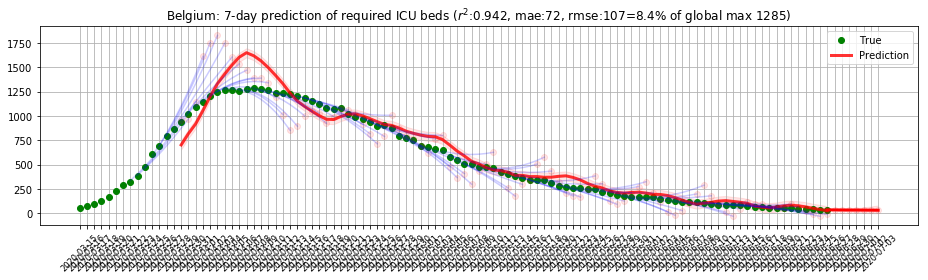

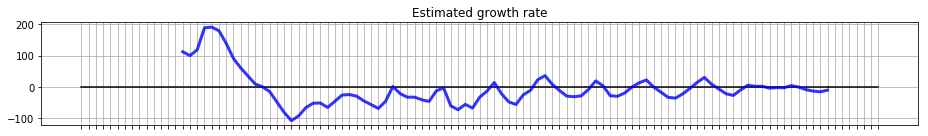

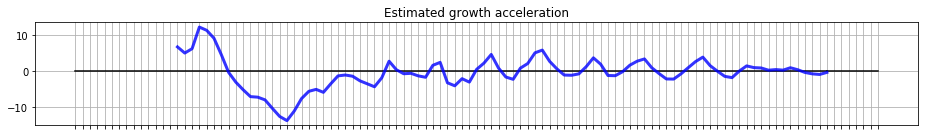

In [30]:
target = 'total_in_icu'
#kf_type = 'linear'
#kf_params = {'kf_p':1, 'kf_r':4, 'kf_q':0.10, 'kf_a':1}
kf_type = 'ensemble'
kf_params = {'kf_p':1, 'kf_r':4, 'kf_q':0.1, 'kf_n':1000}
winsizes = [7]
show_trajectory = False
for winsize in winsizes:
    title = 'Belgium: %d-day prediction of required ICU beds' % winsize
    test_plot(df_hosp[target], winsize, kf_type, kf_params, title)

In [100]:
stringency.head()

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166


### Predicted Cases up to several days in the future

In [231]:
## TODO: Write a wrapper function for the final Dataframe generation. Imprtant for WW Dataset Generation ...

In [107]:
target = 'cases_total'

winsize = 6

In [136]:
belgium_cases = stringency[stringency['ISO']=='BEL'][['DATE', 'country_name', 'ISO', 'cases_new']]

belgium_cases.set_index('DATE', inplace = True)

belgium_cases.head()

,country_name,ISO,cases_new
DATE,,,
2020-01-01,Belgium,BEL,0.0
2020-01-02,Belgium,BEL,0.0
2020-01-03,Belgium,BEL,0.0
2020-01-04,Belgium,BEL,0.0
2020-01-05,Belgium,BEL,0.0


In [144]:
# plt.rcParams["figure.figsize"] = (10,6)

# belgium_cases = interpolate_weekend(belgium_cases, 'cases_new', '2020-01-03')

# plt.plot(belgium_cases['cases_new']) 

In [445]:
belgium_new_cases_preds = kalman_forecast(belgium_cases[target], winsize, 'ensemble', None)

belgium_new_cases_preds

,pred_raw,pred,preds_vel,preds_acc,ci_lower,ci_upper
2020-06-28,33.707302,33.707302,-6.984318,-0.392014,0.0,80.352115
2020-06-29,26.534935,30.121119,-7.360417,-0.376100,0.0,87.911626
2020-06-30,18.984658,26.408965,-7.740136,-0.379718,0.0,97.342570
2020-07-01,11.060266,22.571790,-8.108649,-0.368513,0.0,108.656762
2020-07-02,2.767800,18.610992,-8.476283,-0.367634,0.0,121.869174
2020-07-03,0.000000,15.509160,-8.842227,-0.365944,0.0,138.004084


In [202]:
belgium_new_cases_test = kalman_test(belgium_cases[target], winsize, 'ensemble')

belgium_new_cases_test.tail()

,pred_raw,pred,obs,history,ci_lower,ci_upper,pred_acc,pred_vel
2020-06-23,77.540068,62.529315,112.0,pred 2020-06-17 85.914162 20...,0.0,184.965934,0.155149,-0.938754
2020-06-24,113.736891,58.975763,90.0,pred 2020-06-18 97.959552 ...,0.0,177.770465,0.448225,3.972041
2020-06-25,123.844382,64.416937,13.0,pred 2020-06-19 101.569710 ...,0.0,183.486203,0.510298,5.224935
2020-06-26,103.590140,75.690296,93.0,pred 2020-06-20 94.200477 ...,0.0,193.633372,0.323109,2.514728
2020-06-27,60.276866,90.037718,0.0,pred 2020-06-21 77.912974 20...,0.0,209.339354,-0.054500,-3.129458


In [216]:
belgium_new_cases_preds = pd.concat([belgium_new_cases_test, belgium_new_cases_preds])

belgium_new_cases_preds.iloc[:,-20:]

/opt/conda/envs/Python-3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,ci_lower,ci_upper,history,obs,pred,pred_acc,pred_raw,pred_vel
2020-01-13,0.000000,292.252584,pred 2020-01-07 0.622723 2020...,0.000000,1.670710,0.024577,2.058783,0.302783
2020-01-14,0.000000,260.623505,pred 2020-01-08 -0.147500 2020...,0.000000,0.365572,-0.052405,-2.198184,-0.504034
2020-01-15,0.000000,231.044872,pred 2020-01-09 -0.515827 2020...,0.000000,0.000000,-0.108332,-3.783201,-0.822477
2020-01-16,0.000000,210.969833,pred 2020-01-10 -0.178209 2020...,0.000000,0.000000,-0.074796,-2.335815,-0.589521
2020-01-17,0.000000,192.773205,pred 2020-01-11 0.250259 2020...,0.000000,0.000000,0.011082,0.234846,-0.004391
2020-01-18,0.000000,179.165426,pred 2020-01-12 0.295387 2020...,0.000000,0.000000,-0.031057,-0.196397,-0.178643
2020-01-19,0.000000,166.472616,pred 2020-01-13 0.045064 2020...,0.000000,0.000000,0.049146,0.098833,0.114049
2020-01-20,0.000000,150.583601,pred 2020-01-14 -0.207946 2020...,0.000000,0.000000,-0.002319,-1.428661,-0.248738
2020-01-21,0.000000,140.289402,pred 2020-01-15 0.524191 2020...,0.000000,0.000000,0.015282,0.772678,0.053739
2020-01-22,0.000000,130.750625,pred 2020-01-16 0.090580 2020...,0.000000,0.000000,-0.018230,-0.348854,-0.091509


In [345]:
belgium_cases.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27'],
              dtype='datetime64[ns]', name='DATE', length=179, freq=None)

In [1]:
# kf_type = 'ensemble'
# kf_params = {'kf_p':1, 'kf_r':4, 'kf_q':0.1, 'kf_n':1000}
# winsizes = [6]
# show_trajectory = True
# for winsize in winsizes:
#     title = 'Belgium: %d-day prediction of Covid-19 Cases' % winsize
#     test_plot(belgium_cases[target], winsize, kf_type, kf_params, title)

In [162]:
belgium_df = belgium_new_cases_preds[['pred', 'ci_lower', 'ci_upper', 'pred_acc', 'pred_vel']]

belgium_df['country'] = 'belgium'

belgium_df.reset_index(inplace = True)

belgium_df.rename(columns = {'index' : 'DATE'}, inplace=True)

belgium_df['DATE'] = pd.to_datetime(belgium_df['DATE'], format ="%Y-%m-%d")

belgium_df.head()

/opt/conda/envs/Python-3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.6/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python-3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country
0,2020-01-13,10.465266,0.0,308.628264,0.248347,2.099828,belgium
1,2020-01-14,10.580609,0.0,267.809704,0.206358,2.176310,belgium
2,2020-01-15,10.280533,0.0,239.467743,0.196123,2.190859,belgium
3,2020-01-16,9.860841,0.0,219.039777,0.196295,1.788679,belgium
4,2020-01-17,9.435265,0.0,199.715535,0.129689,1.557881,belgium


In [220]:
stringency_belgium = stringency[['DATE', 'ISO', 'npi_stringency_index', 'tests_new_per_thousand', 'stats_population_density' , 'stats_population_urban',  'country_name']]

stringency_belgium = stringency_belgium[stringency_belgium['ISO']=='BEL'].drop_duplicates()

stringency_belgium.head()

,DATE,ISO,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,country_name
1969,2020-01-01,BEL,0.0,NaN,375.564,3081719.0,Belgium
1970,2020-01-02,BEL,0.0,NaN,375.564,3081719.0,Belgium
1971,2020-01-03,BEL,0.0,NaN,375.564,3081719.0,Belgium
1972,2020-01-04,BEL,0.0,NaN,375.564,3081719.0,Belgium
1973,2020-01-05,BEL,0.0,NaN,375.564,3081719.0,Belgium


In [221]:
belgium_risk_df.shape

(174, 14)

In [222]:
belgium_risk_df = belgium_df.merge(stringency_belgium, left_on = 'DATE' , right_on = 'DATE', how = 'left')

# assert belgium_risk_df.shape[0] == belgium_df.shape[0]

belgium_risk_df.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,ISO,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,country_name
0,2020-01-13,10.465266,0.0,308.628264,0.248347,2.099828,belgium,BEL,0.0,NaN,375.564,3081719.0,Belgium
1,2020-01-14,10.580609,0.0,267.809704,0.206358,2.176310,belgium,BEL,0.0,NaN,375.564,3081719.0,Belgium
2,2020-01-15,10.280533,0.0,239.467743,0.196123,2.190859,belgium,BEL,0.0,NaN,375.564,3081719.0,Belgium
3,2020-01-16,9.860841,0.0,219.039777,0.196295,1.788679,belgium,BEL,0.0,NaN,375.564,3081719.0,Belgium
4,2020-01-17,9.435265,0.0,199.715535,0.129689,1.557881,belgium,BEL,0.0,NaN,375.564,3081719.0,Belgium


In [223]:
belgium_risk_df

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,ISO,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,country_name
0,2020-01-13,10.465266,0.000000,308.628264,0.248347,2.099828,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
1,2020-01-14,10.580609,0.000000,267.809704,0.206358,2.176310,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
2,2020-01-15,10.280533,0.000000,239.467743,0.196123,2.190859,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
3,2020-01-16,9.860841,0.000000,219.039777,0.196295,1.788679,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
4,2020-01-17,9.435265,0.000000,199.715535,0.129689,1.557881,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
5,2020-01-18,8.632067,0.000000,179.573585,0.084598,1.076090,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
6,2020-01-19,8.190013,0.000000,165.015723,0.077868,1.049718,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
7,2020-01-20,7.162252,0.000000,158.278657,0.081475,0.734874,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
8,2020-01-21,5.546178,0.000000,143.085004,0.030061,0.310241,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium
9,2020-01-22,4.428496,0.000000,134.450452,0.005549,0.234407,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium


In [225]:
belgium_risk_df['npi_stringency_index'].fillna(method='ffill', inplace = True)

belgium_risk_df['infections_var'] = belgium_risk_df['pred'].diff()

In [226]:
belgium_risk_df

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,ISO,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,country_name,infections_var
0,2020-01-13,10.465266,0.000000,308.628264,0.248347,2.099828,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,NaN
1,2020-01-14,10.580609,0.000000,267.809704,0.206358,2.176310,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,0.115343
2,2020-01-15,10.280533,0.000000,239.467743,0.196123,2.190859,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-0.300076
3,2020-01-16,9.860841,0.000000,219.039777,0.196295,1.788679,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-0.419692
4,2020-01-17,9.435265,0.000000,199.715535,0.129689,1.557881,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-0.425576
5,2020-01-18,8.632067,0.000000,179.573585,0.084598,1.076090,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-0.803198
6,2020-01-19,8.190013,0.000000,165.015723,0.077868,1.049718,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-0.442054
7,2020-01-20,7.162252,0.000000,158.278657,0.081475,0.734874,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-1.027762
8,2020-01-21,5.546178,0.000000,143.085004,0.030061,0.310241,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-1.616074
9,2020-01-22,4.428496,0.000000,134.450452,0.005549,0.234407,belgium,BEL,0.00,NaN,375.564,3081719.0,Belgium,-1.117682


In [55]:
from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="my_geocoder")
# location = geolocator.geocode("Belgium")
# belgium_risk_df['latitude'] = location.latitude
# belgium_risk_df['longitude'] = location.longitude

# belgium_risk_df

In [897]:
# from math import exp

# def risk_index(cases_acceleration, npi_stringency_index, **kwargs):
    
#     raw_index =  (0.6 * cases_acceleration - 0.4 * (npi_stringency_index/100))
    
#     return 1 / (1 + exp(-raw_index))

# ## The lower the stringency idenx --> Higher risk 
# ## Mobility Data ? 


# def discrete_risk_idx(risk_index):
    
#     if risk_index < 0.3:
        
#         return "low risk"
    
#     elif risk_index < 0.5:
            
#             return 'moderate risk'
    
#     else:
        
#         return "high risk"

# def generate_predictions(iso_country, target, winsize):
    
#     '''
    
#     '''
    
#     print("Processing {} Data".format(iso_country))
    
#     print("="*50)

    
#     ## Extract Target Data from Main Dataframe
    
#     columns = ['DATE', 'country_name', 'ISO'] + [target]
    
#     filtered_data  = stringency[stringency['ISO']==iso_country][columns]
    
#     filtered_data.set_index('DATE', inplace = True)
    
#     ## Train KF and Predict History , Predict Future
    
#     print("Training KF and Predicting {}, {} days ahead".format(target, winsize))
    
#     print("-"*32)
    
#     predict_hist = kalman_test(filtered_data[target], winsize, 'ensemble')
    
#     predict_future = kalman_forecast(filtered_data[target], winsize, 'ensemble', None)

#     kf_predictions_all = pd.concat([predict_hist, predict_future])
    
#     kf_predictions_all = kf_predictions_all[['pred', 'ci_lower', 'ci_upper', 'pred_acc', 'pred_vel']]

#     kf_predictions_all['country'] = iso_country

#     kf_predictions_all.reset_index(inplace = True)

#     kf_predictions_all.rename(columns = {'index' : 'DATE'}, inplace=True)

#     kf_predictions_all['DATE'] = pd.to_datetime(kf_predictions_all['DATE'], format ="%Y-%m-%d")

#     print("Reading and merging with Stringency and Complementary Data")
    
#     print("-"*32)
    
#     stringency_data = stringency[stringency['ISO']==iso_country].drop_duplicates()
    
#     stringency_data = stringency_data[['DATE', 'npi_stringency_index', 'tests_new_per_thousand', 'stats_population_density' , 'stats_population_urban',  'stats_population']]

#     stringency_merged_df  = kf_predictions_all.merge(stringency_data, left_on = 'DATE' , right_on = 'DATE', how = 'left')

#     print("Extrapolating Stringency Indices and Static Data")
    
#     print("-"*32)

#     # assert belgium_risk_df.shape[0] == belgium_df.shape[0]
    
#     stringency_merged_df['npi_stringency_index'].fillna(method='ffill', inplace = True)
    
#     stringency_merged_df['stats_population_density'].fillna(method='ffill', inplace = True)
    
#     stringency_merged_df['stats_population_urban'].fillna(method='ffill', inplace = True)
    
#     stringency_merged_df['stats_population'].fillna(method='ffill', inplace = True)

#     stringency_merged_df['infections_var'] = stringency_merged_df['pred'].pct_change()
    
#     print("Calculating the Risk Index")
    
#     print("-"*32)

#     stringency_merged_df['risk_index'] = stringency_merged_df[['infections_var', 'npi_stringency_index']].apply(lambda x: risk_index(x[0], x[1]), axis =1)
    
#     stringency_merged_df['risk_index_disc'] = stringency_merged_df['risk_index'].apply(lambda x: discrete_risk_idx(x))

#     print("Adding Geolocation Data")
    
#     print("-"*32)

#     geolocator = Nominatim(user_agent = "my_geocoder")
    
#     location = geolocator.geocode(iso_country)
    
#     stringency_merged_df['latitude'] = location.latitude
    
#     stringency_merged_df['longitude'] = location.longitude
    
#     return stringency_merged_df


In [293]:
france_df = generate_predictions('FRA', 'cases_total', 6)

belgium_df = generate_predictions('BEL', 'cases_total', 6)

germany_df = generate_predictions('DEU', 'cases_total', 6)

england_df = generate_predictions('GBR', 'cases_total', 6)

spain_df = generate_predictions('ESP', 'cases_total', 6)

italy_df = generate_predictions('ITA', 'cases_total', 6)

morocco_df = generate_predictions('MAR', 'cases_total', 6)


Processing FRA Data
Training KF and Predicting cases_total, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Processing BEL Data
Training KF and Predicting cases_total, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Processing DEU Data
Training KF and Predicting cases_total, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Extrapol

In [295]:
france_df.tail()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,infections_var,risk_index,risk_index_disc,latitude,longitude
168,2020-06-29,163051.071720,162993.749811,163108.393629,NaN,NaN,FRA,65.74,NaN,122.578,15244343.0,65273512.0,0.001346,0.434835,moderate risk,50.022944,8.524938
169,2020-06-30,163270.350179,163200.202267,163340.498091,NaN,NaN,FRA,65.74,NaN,122.578,15244343.0,65273512.0,0.001345,0.434835,moderate risk,50.022944,8.524938
170,2020-07-01,163489.816433,163404.990175,163574.642691,NaN,NaN,FRA,65.74,NaN,122.578,15244343.0,65273512.0,0.001344,0.434834,moderate risk,50.022944,8.524938
171,2020-07-02,163709.472324,163608.086138,163810.858511,NaN,NaN,FRA,65.74,NaN,122.578,15244343.0,65273512.0,0.001344,0.434834,moderate risk,50.022944,8.524938
172,2020-07-03,163929.319547,163809.449063,164049.190031,NaN,NaN,FRA,65.74,NaN,122.578,15244343.0,65273512.0,0.001343,0.434834,moderate risk,50.022944,8.524938


In [272]:
belgium_df.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,infections_var,risk_index,latitude,longitude
0,2020-01-13,0.000000,0.0,295.896042,0.227625,2.196646,BEL,0.0,NaN,375.564,3081719.0,11589616.0,NaN,NaN,40.005774,-81.009752
1,2020-01-14,0.925700,0.0,261.930335,0.205201,2.261129,BEL,0.0,NaN,375.564,3081719.0,11589616.0,inf,inf,40.005774,-81.009752
2,2020-01-15,2.927222,0.0,231.384047,0.122641,1.276150,BEL,0.0,NaN,375.564,3081719.0,11589616.0,2.162170,1.297302,40.005774,-81.009752
3,2020-01-16,4.939505,0.0,212.963362,0.049765,0.694797,BEL,0.0,NaN,375.564,3081719.0,11589616.0,0.687438,0.412463,40.005774,-81.009752
4,2020-01-17,5.997054,0.0,192.588080,0.050245,0.451421,BEL,0.0,NaN,375.564,3081719.0,11589616.0,0.214100,0.128460,40.005774,-81.009752


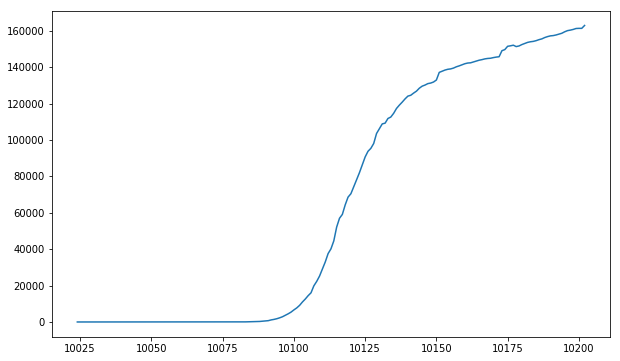

In [273]:
plt.plot(stringency[stringency['ISO']=='FRA']['cases_total'])

In [291]:
df_all = pd.concat([france_df, belgium_df, germany_df, england_df, spain_df, italy_df, morocco_df])

df_all.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,infections_var,risk_index,latitude,longitude
0,2020-01-13,0.0,0.0,295.345904,-0.058774,-0.405837,FRA,0.0,NaN,122.578,15244343.0,65273512.0,NaN,NaN,50.022944,8.524938
1,2020-01-14,0.0,0.0,262.669857,-0.167796,-1.746038,FRA,0.0,NaN,122.578,15244343.0,65273512.0,NaN,NaN,50.022944,8.524938
2,2020-01-15,0.0,0.0,234.069929,-0.116056,-1.150832,FRA,0.0,NaN,122.578,15244343.0,65273512.0,NaN,NaN,50.022944,8.524938
3,2020-01-16,0.0,0.0,208.598844,-0.009099,-0.135367,FRA,0.0,NaN,122.578,15244343.0,65273512.0,NaN,NaN,50.022944,8.524938
4,2020-01-17,0.0,0.0,192.907705,0.063075,0.436365,FRA,0.0,NaN,122.578,15244343.0,65273512.0,NaN,NaN,50.022944,8.524938


In [290]:
df_all[(df_all['country'] == 'GBR')]

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,infections_var,risk_index,latitude,longitude
0,2020-01-13,6.133113,0.000000,323.049435,0.026424,0.545109,GBR,0.00,NaN,272.898,17831615.0,67886004.0,NaN,NaN,53.317942,-60.46425
1,2020-01-14,5.935587,0.000000,272.516495,0.143335,1.391526,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.032206,0.495169,53.317942,-60.46425
2,2020-01-15,6.017044,0.000000,245.709640,0.151862,1.708036,GBR,0.00,NaN,272.898,17831615.0,67886004.0,0.013723,0.502059,53.317942,-60.46425
3,2020-01-16,5.304064,0.000000,219.381099,0.054358,0.605221,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.118493,0.482233,53.317942,-60.46425
4,2020-01-17,3.737265,0.000000,205.208867,-0.053196,-0.454320,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.295396,0.455806,53.317942,-60.46425
5,2020-01-18,2.970898,0.000000,179.010599,-0.087126,-0.734404,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.205061,0.469280,53.317942,-60.46425
6,2020-01-19,2.008140,0.000000,166.989698,-0.079448,-0.662430,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.324063,0.451543,53.317942,-60.46425
7,2020-01-20,0.241614,0.000000,150.161608,-0.049839,-0.602695,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-0.879683,0.371028,53.317942,-60.46425
8,2020-01-21,0.000000,0.000000,143.790883,-0.043308,-0.492290,GBR,0.00,NaN,272.898,17831615.0,67886004.0,-1.000000,0.354344,53.317942,-60.46425
9,2020-01-22,0.000000,0.000000,137.232271,-0.073259,-0.486372,GBR,0.00,NaN,272.898,17831615.0,67886004.0,NaN,NaN,53.317942,-60.46425


In [234]:
france_cases = stringency[stringency['ISO']=='FRA'][['DATE', 'country_name', 'ISO', 'cases_new']]

france_cases.set_index('DATE', inplace = True)

france_cases.head()

,country_name,ISO,cases_new
DATE,,,
2020-01-01,France,FRA,0.0
2020-01-02,France,FRA,0.0
2020-01-03,France,FRA,0.0
2020-01-04,France,FRA,0.0
2020-01-05,France,FRA,0.0


In [235]:
france_new_cases_preds = kalman_forecast(france_cases[target], winsize, 'ensemble', None)

france_new_cases_preds

,pred_raw,pred,ci_lower,ci_upper
2020-06-28,711.263555,711.263555,666.599275,755.927835
2020-06-29,776.556806,743.910181,688.524204,799.296157
2020-06-30,848.372112,778.730825,710.635363,846.826286
2020-07-01,926.696814,815.722322,732.934874,898.509770
2020-07-02,1011.535057,854.884869,755.429984,954.339754
2020-07-03,1102.900855,896.220867,778.093278,1014.348456


In [237]:
france_new_cases_test = kalman_test(france_cases[target], winsize, 'ensemble')

france_new_cases_test.tail()

,pred_raw,pred,obs,history,ci_lower,ci_upper,pred_acc,pred_vel
2020-06-23,138.407699,214.091734,373.0,pred 2020-06-17 311.113735 ...,95.532405,332.651062,-0.854425,-31.355083
2020-06-24,273.496757,268.523152,517.0,pred 2020-06-18 344.228011 ...,148.724496,388.321807,0.677308,-9.752474
2020-06-25,396.733497,284.693927,81.0,pred 2020-06-19 379.116005 ...,167.207318,402.180536,1.848453,8.476317
2020-06-26,813.231684,353.764455,0.0,pred 2020-06-20 525.057010 ...,235.967609,471.561301,5.459211,64.452616
2020-06-27,958.082263,451.319418,1588.0,pred 2020-06-21 587.821022 ...,334.241827,568.397008,6.205130,80.278136


## Regional and Departmental Risk Index

### Reading UK Data at the Regional and the ULTA level

In [18]:
%%time

import requests

## Reading UK Regional and LTLA Reported Cases, source: https://coronavirus.data.gov.uk/

filename = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'

r = requests.get(filename, stream=True)

uk_regional_cov19 = pd.read_csv(r.raw)


## Reading the Health Life Expectancy for 65+ population , 
## https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandlifeexpectancies/datasets/healthstatelifeexpectancyatbirthandatage65bylocalareasuk

xls = pd.ExcelFile('/project_data/data_asset/hsleatbirthandatage65byukla201618.xlsx')

uk_regional_hle_males = pd.read_excel(xls, 'HE - Male at 65', skiprows = 3)

uk_regional_hle_males['sex'] = 'male'

uk_regional_hle_females = pd.read_excel(xls, 'HE - Female at 65', skiprows = 3)

uk_regional_hle_females['sex'] = 'female'

uk_regional_hle = pd.concat([uk_regional_hle_males, uk_regional_hle_females], axis = 0)

## Reading the UK Pop. Stats

xls = pd.ExcelFile('/project_data/data_asset/ukmidyearestimates20192020ladcodes.xls')

uk_pop_stats = pd.read_excel(xls, 'MYE2 - Persons', skiprows = 4)

## Reading UK Health Systems

uk_healthcare_system = pd.read_csv('/project_data/data_asset/20191015_stateofcare1819_ratingsdata.csv', encoding = 'latin')


CPU times: user 2.39 s, sys: 101 ms, total: 2.49 s
Wall time: 2.71 s


In [11]:
uk_regional_hle[uk_regional_hle['Area Codes']  == 'E09000027']


,Area Codes,Region,Upper tier local authority,City,LE,LCL,UCL,Unnamed: 7,HLE,LCL.1,UCL.1,%,Unnamed: 12,DfLE,LCL.2,UCL.2,%.1,sex
282,E09000027,NaN,NaN,Richmond upon Thames,20.46361,20.03778,20.88944,NaN,13.69743,11.12250,16.27236,66.93556,NaN,10.612068,8.155480,13.068656,51.858249,male
282,E09000027,NaN,NaN,Richmond upon Thames,23.58575,23.16233,24.00916,NaN,13.18869,10.43941,15.93797,55.91806,NaN,12.913014,10.189398,15.636630,54.749228,female


In [19]:
uk_pop_stats.rename(columns = {'+90': 90})

age_cols = np.arange(65, 90)

uk_pop_stats['pop_above_65'] = uk_pop_stats[age_cols].sum(axis = 1)

uk_pop_stats.rename(columns = {'Geography1': 'area_type', 'Code': 'area_code', 'Name': 'area_name'}, inplace = True)

uk_pop_stats = uk_pop_stats[['area_code', 'area_name', 'area_type', 'All ages', 'pop_above_65']]

uk_pop_stats['area_name'] = uk_pop_stats['area_name'].apply(lambda z : z[0].upper() + z[1:].lower() if isinstance(z, str) else z)

uk_pop_stats['area_type'] = uk_pop_stats['area_type'].apply(lambda z : z.upper() if isinstance(z, str) else z)

uk_pop_stats.head()


,area_code,area_name,area_type,All ages,pop_above_65
0,K02000001,United kingdom,COUNTRY,66796807.0,11769780.0
1,K03000001,Great britain,COUNTRY,64903140.0,11468790.0
2,K04000001,England and wales,COUNTRY,59439840.0,10468303.0
3,E92000001,England,COUNTRY,56286961.0,9836443.0
4,E12000001,North east,REGION,2669941.0,509400.0


In [16]:
uk_healthcare_system.head()

,Org ID,Org Name,Org Type,Org Sub Type,Org Inspectorate,Org Primary Inspection Category Code,Org Primary Inspection Category,Org Local Authority,Org ONSPD CCG,Rating,Service / Population Group,Domain,Report Type,Publication Date
0,1-1000210669,Kingswood House Nursing Home,Social Care Org,Location,Adult social care,S1,Residential social care,East Sussex,NHS Hastings and Rother CCG,Good,Overall,Effective,Location,04/08/2018
1,1-1000210669,Kingswood House Nursing Home,Social Care Org,Location,Adult social care,S1,Residential social care,East Sussex,NHS Hastings and Rother CCG,Good,Overall,Caring,Location,04/08/2018
2,1-1000210669,Kingswood House Nursing Home,Social Care Org,Location,Adult social care,S1,Residential social care,East Sussex,NHS Hastings and Rother CCG,Good,Overall,Responsive,Location,04/08/2018
3,1-1000210669,Kingswood House Nursing Home,Social Care Org,Location,Adult social care,S1,Residential social care,East Sussex,NHS Hastings and Rother CCG,Requires improvement,Overall,Safe,Location,04/08/2018
4,1-1000210669,Kingswood House Nursing Home,Social Care Org,Location,Adult social care,S1,Residential social care,East Sussex,NHS Hastings and Rother CCG,Requires improvement,Overall,Well-led,Location,04/08/2018


In [17]:
uk_regional_cov19.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-07-15,0,0.0,0.0,250885,250379.0,506.0,448.2
1,South West,E12000009,Region,2020-07-15,0,NaN,NaN,12887,NaN,NaN,230.1
2,South East,E12000008,Region,2020-07-15,0,NaN,NaN,34391,NaN,NaN,376.5
3,London,E12000007,Region,2020-07-15,0,NaN,NaN,34273,NaN,NaN,384.7
4,East of England,E12000006,Region,2020-07-15,0,NaN,NaN,23876,NaN,NaN,385.0


In [20]:
uk_regional_cov19['Specimen date'] = pd.to_datetime(uk_regional_cov19['Specimen date'], format = "%Y-%m-%d")

uk_regional_cov19.sort_values('Specimen date', ascending = True, inplace = True)

uk_regional_cov19.set_index('Specimen date', inplace = True)

# uk_regional_cov19['Area name'] = uk_regional_cov19['Area name'].apply(lambda x : x.upper())

uk_regional_cov19['Area type'] = uk_regional_cov19['Area type'].apply(lambda x : x.upper())

uk_regional_cov19['Area type'] = uk_regional_cov19['Area type'].apply(lambda x : 'COUNTRY' if x == 'NATION' else x)

uk_regional_cov19.rename(columns = {'Area type': 'area_type', 'Area name': 'area_name', 'Area code': 'area_code'}, inplace = True)

uk_regional_cov19.head()


,area_name,area_code,area_type,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
Specimen date,,,,,,,,,,
2020-01-30,York,E06000014,LOWER TIER LOCAL AUTHORITY,1,NaN,NaN,1,NaN,NaN,0.5
2020-01-30,England,E92000001,COUNTRY,2,2.0,0.0,2,2.0,0.0,0.0
2020-01-30,York,E06000014,UPPER TIER LOCAL AUTHORITY,1,NaN,NaN,1,NaN,NaN,0.5
2020-01-30,Yorkshire and The Humber,E12000003,REGION,1,NaN,NaN,1,NaN,NaN,0.0
2020-02-05,Brighton and Hove,E06000043,LOWER TIER LOCAL AUTHORITY,1,NaN,NaN,1,NaN,NaN,0.3


In [21]:
uk_regional_cov19['area_type'].unique()

array(['LOWER TIER LOCAL AUTHORITY', 'COUNTRY',
       'UPPER TIER LOCAL AUTHORITY', 'REGION'], dtype=object)

In [24]:
stringency[stringency['ISO']=='GBR']

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
11078,GBR,2020-01-01,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-30.0,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,NaN,NaN,2.647874e-06,0.005010,20.149454,4.945226,3.233039,6.449929,2.679690
11079,GBR,2020-01-02,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-29.0,-65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,NaN,NaN,1.744260e-05,0.006034,15.527632,7.820541,5.697946,9.708908,5.905965
11080,GBR,2020-01-03,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-28.0,-64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,NaN,NaN,3.019086e-05,0.005326,23.592653,7.091551,4.386586,9.765430,5.183782
11081,GBR,2020-01-04,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-27.0,-63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,12.000000,NaN,3.982386e-06,0.005001,17.100597,6.246121,4.530818,7.870001,4.576311
11082,GBR,2020-01-05,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-26.0,-62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,12.000000,NaN,4.894633e-06,0.005522,18.397035,7.272789,6.033392,8.658089,4.376860
11083,GBR,2020-01-06,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-25.0,-61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,12.000000,NaN,2.405168e-05,0.005453,19.062605,7.194254,5.759330,8.826372,6.035892
11084,GBR,2020-01-07,UNITED KINGDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,39753.244,-24.0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,22.3,18018197.0,8474410.0,12.000000,NaN,1.511153e-05,0.006464,18.770922,8.705327,

In [324]:
# series = uk_regional_cov19[uk_regional_cov19['Area type']=='Nation']

# predict_hist = kalman_test(series['Cumulative lab-confirmed cases'], 6, 'ensemble')

# predict_future = kalman_forecast(series['Cumulative lab-confirmed cases'], 6, 'ensemble', None)

# kf_predictions_all = pd.concat([predict_hist, predict_future])

# kf_predictions_all = kf_predictions_all[['pred', 'ci_lower', 'ci_upper', 'pred_acc', 'pred_vel']]

# kf_predictions_all.loc[:,'real_figures'] =  pd.Series(real_hist)

# kf_predictions_all 

In [53]:
from math import exp

def risk_index(growth_rate, npi_stringency_index, population_density, **kwargs):
    
    raw_index =  (0.5 * growth_rate  + 0.2 * (population_density/100) - 0.3 * (npi_stringency_index/100))
    
    raw_index = 100 * 1 / (1 + exp(-0.1 * raw_index))
        
    return raw_index


def discrete_risk_idx(risk_index):
    
    if risk_index < 20:
        
        return "0 - 20"
    
    elif risk_index < 50:
            
        return "20 - 50"
    
    elif risk_index < 70:
            
        return "50 - 70"
        
    elif risk_index < 90:
            
        return "70 - 90"
        
    else:
        
        return "90 - 100"
    
## stringency + mobility --> population's behaviour 
## WS2 --> regional's mood and awarness could be an input 


def generate_predictions_granular(df, target, pop_stats, winsize, country_name, country_iso_code, area_type, area_name, geo_locate):
    
    '''
    
    '''
    
    print("Predicting {} Days ahead".format(winsize))
    
    print("="*50)
    
    columns = ['area_name', 'area_type', 'area_code'] + [target]
    
    series = df[(df['area_name'] == area_name) & (df['area_type'] == area_type)][columns]
    
    print("Series Shape: {}".format(series.shape))
    
    if len(series) > 0 :
        
       ## Train KF and Predict History , Predict Future

        print("Training KF and Predicting {}, {} days ahead".format(target, winsize))

        print("-"*32)

        predict_hist = kalman_test(series[target], winsize, 'linear')

        predict_future = kalman_forecast(series[target], winsize, 'linear', None)

        kf_predictions_all = pd.concat([predict_hist, predict_future])

        kf_predictions_all = kf_predictions_all[['pred', 'ci_lower', 'ci_upper', 'pred_acc', 'pred_vel']]
        
        kf_predictions_all.loc[:,'real_figures'] =  pd.Series(series[target])
        
        kf_predictions_all['country'] = country_name

        kf_predictions_all['area_name'] = series['area_name'][0]

        kf_predictions_all['area_type'] = series['area_type'][0]

        kf_predictions_all.reset_index(inplace = True)

        kf_predictions_all.rename(columns = {'index' : 'DATE'}, inplace=True)

        kf_predictions_all['DATE'] = pd.to_datetime(kf_predictions_all['DATE'], format ="%Y-%m-%d")

        print("Reading and merging with Stringency and Complementary Data")

        print("-"*32)

        stringency_data = stringency[stringency['ISO']==country_iso_code].drop_duplicates()

        stringency_data = stringency_data[['DATE', 'npi_stringency_index', 'tests_new_per_thousand', 'stats_population_density' , 'stats_population_urban',  'stats_population', 

                                           'mobility_retail_recreation', 'mobility_grocery_pharmacy', 'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces']]

        stringency_merged_df  = kf_predictions_all.merge(stringency_data, left_on = 'DATE' , right_on = 'DATE', how = 'left')

        print("Merging with Regional Population Data")

        print("-"*32)
        
        if country_name != 'Italy':

            area_code = series[(series['area_name'] == area_name)]['area_code'][0]  

            if len(pop_stats[pop_stats['area_code'] == str(area_code)]) > 0:

                if country_name == 'France': 

                     stringency_merged_df['area_population_density'] = int(pop_stats[(pop_stats['area_code']==str(area_code)) & (pop_stats['area_type'] == area_type)]['All ages'])*100.00/int(pop_stats[pop_stats['area_name'] == country_name]['All ages'].values[0])


                elif country_name == 'England': 

                     stringency_merged_df['area_population_density'] = int(pop_stats[(pop_stats['area_code']==str(area_code))]['All ages'])*100.00/int(pop_stats[pop_stats['area_name'] == country_name]['All ages'].values[0])      


            else:

                stringency_merged_df['area_population_density'] = 0     
        
        else:
            
            print("Processing Exceptional Case of Italy")
            
            print("-"*32)
            
            if len(pop_stats[(pop_stats['area_name'] == area_name)]) > 0 :
            
                    stringency_merged_df['area_population_density'] = int(pop_stats[(pop_stats['area_name'] == area_name)]['All ages'])*100.00/int(pop_stats[pop_stats['area_name'] == country_name]['All ages'].values[0])
            
            else:
                
                   stringency_merged_df['area_population_density'] = 0 
                    
        print("Extrapolating Stringency Indices and Static Data")

        print("-"*32)
        
        ### --> TBD: should be updated with Predictions instead

        stringency_merged_df['npi_stringency_index'].fillna(method='ffill', inplace = True)

        stringency_merged_df['stats_population_density'].fillna(method='ffill', inplace = True)

        stringency_merged_df['stats_population_urban'].fillna(method='ffill', inplace = True)

        stringency_merged_df['stats_population'].fillna(method='ffill', inplace = True)

        stringency_merged_df['area_population_density'].fillna(method = 'ffill', inplace = True)

    #     stringency_merged_df['infections_var'] = stringency_merged_df['pred'].pct_change()

        print("Calculating the Risk Index")

        print("-"*32)

        stringency_merged_df['risk_index'] = stringency_merged_df[['pred_vel', 'npi_stringency_index', 'area_population_density']].apply(lambda x: risk_index(x[0], x[1], x[2]), axis =1)

        stringency_merged_df['risk_index_disc'] = stringency_merged_df['risk_index'].apply(lambda x: discrete_risk_idx(x))

        if geo_locate:
            
            print("Adding Geolocation Data")

            print("-"*32)

            geolocator = Nominatim(user_agent = "my_geocoder")

            location = geolocator.geocode(area_name)

            stringency_merged_df['latitude'] = location.latitude

            stringency_merged_df['longitude'] = location.longitude
        
        else:
            
            stringency_merged_df['latitude'] = None

            stringency_merged_df['longitude'] = None


        return stringency_merged_df


In [632]:
# columns = ['Area name', 'Area type', 'Area code'] + ['Cumulative lab-confirmed cases']

# series = series[series['Area type']!='Lower tier local authority']

# series = uk_regional_data[uk_regional_data['Area name']=='Kent'][columns]

# dates = series.index

# series['Cumulative lab-confirmed cases'][dates[0]]


# generate_predictions_granular(uk_regional_data, 'Cumulative lab-confirmed cases', 6, 'ENGLAND', 'GBR', 'Buckinghamshire')

In [594]:
# (series.reset_index().groupby(['Specimen date', 'Area name', 'Area type', 'Area code'], as_index=False).apply(lambda x: x if len(x)==1 else x.iloc[[-2]])

#    .reset_index(level=0, drop=True))

## Processing Risk Index for England

In [22]:
uk_regional_cov19.dtypes

area_name                                object
area_code                                object
area_type                                object
Daily lab-confirmed cases                 int64
Previously reported daily cases         float64
Change in daily cases                   float64
Cumulative lab-confirmed cases            int64
Previously reported cumulative cases    float64
Change in cumulative cases              float64
Cumulative lab-confirmed cases rate     float64
dtype: object

In [23]:
# int(uk_pop_stats[uk_pop_stats['area_name'] == 'ENGLAND']['All ages'].values[0])

# series = uk_regional_cov19[uk_regional_cov19['Area type'] == 'NATION']

# area_code = series[(series['Area name'] == 'ENGLAND')]['Area code'][0]  

# uk_pop_stats[(uk_pop_stats['area_code']==str(area_code)) & (uk_pop_stats['area_type'] == 'NATION')]['All ages']

uk_pop_stats[uk_pop_stats['area_code'] == 'E92000001']

,area_code,area_name,area_type,All ages,pop_above_65
3,E92000001,England,COUNTRY,56286961.0,9836443.0


In [714]:
uk_regional_cov19.head()

,Area name,Area code,Area type,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
Specimen date,,,,,,,,,,
2020-01-30,YORK,E06000014,LOWER TIER LOCAL AUTHORITY,1,NaN,NaN,1,NaN,NaN,0.5
2020-01-30,ENGLAND,E92000001,COUNTRY,2,2.0,0.0,2,2.0,0.0,0.0
2020-01-30,YORK,E06000014,UPPER TIER LOCAL AUTHORITY,1,NaN,NaN,1,NaN,NaN,0.5
2020-01-30,YORKSHIRE AND THE HUMBER,E12000003,REGION,1,NaN,NaN,1,NaN,NaN,0.0
2020-02-03,TEIGNBRIDGE,E07000045,LOWER TIER LOCAL AUTHORITY,2,NaN,NaN,2,NaN,NaN,1.5


In [716]:
## Sanity Chack for EAST MIDLANDS

In [56]:
%%time

# area_types_uk = uk_regional_data['Area type'].unique()

area_types_uk = ['COUNTRY', 'REGION', 'UPPER TIER LOCAL AUTHORITY']

geo_locate = True

all_areas_uk_risk_index = pd.DataFrame()

for area_type_i in area_types_uk: 
    
    uk_regional_data_i = uk_regional_cov19[uk_regional_cov19['area_type'] == area_type_i]
    
    geo_list = uk_regional_data_i['area_name'].unique()
    
    all_areas_names_uk = pd.DataFrame()
    
    for ii in geo_list:
        
        print("Generating risk index for: {} - {}".format(area_type_i, ii))

        kf_predictions_all = generate_predictions_granular(uk_regional_data_i, 'Cumulative lab-confirmed cases', uk_pop_stats, 6, 'England', 'GBR', area_type_i, ii, geo_locate)

        all_areas_names_uk = all_areas_names_uk.append(kf_predictions_all)
    
    all_areas_uk_risk_index = all_areas_uk_risk_index.append(all_areas_names_uk)
                
all_areas_uk_risk_index.head()


Generating risk index for: COUNTRY - England
Predicting 6 Days ahead
Series Shape: (150, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - Yorkshire and The Humber
Predicting 6 Days ahead
Series Shape: (141, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
----------------

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Bradford
Predicting 6 Days ahead
Series Shape: (125, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Not

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Kensington and Chelsea
Predicting 6 Days ahead
Series Shape: (102, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL A

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Buckinghamshire
Predicting 6 Days ahead
Series Shape: (131, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORIT

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Redbridge
Predicting 6 Days ahead
Series Shape: (116, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Hi

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Oldham
Predicting 6 Days ahead
Series Shape: (128, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Cumbr

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Sutton
Predicting 6 Days ahead
Series Shape: (112, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Hamme

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Enfield
Predicting 6 Days ahead
Series Shape: (116, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Have

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Suffolk
Predicting 6 Days ahead
Series Shape: (118, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Bren

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Portsmouth
Predicting 6 Days ahead
Series Shape: (93, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Co

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Dorset
Predicting 6 Days ahead
Series Shape: (98, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - Redcar

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - St. Helens
Predicting 6 Days ahead
Series Shape: (113, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - G

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL AUTHORITY - North East Lincolnshire
Predicting 6 Days ahead
Series Shape: (83, 4)
Training KF and Predicting Cumulative lab-confirmed cases, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: UPPER TIER LOCAL A

In [72]:
all_areas_uk_risk_index[all_areas_uk_risk_index['area_name'] == 'Leicester']

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,real_figures,country,area_name,area_type,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,area_population_density,risk_index,risk_index_disc,latitude,longitude
0,2020-03-25,35.410341,0.000000,72.646218,1.068298,12.413757,69.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,70.37,NaN,272.898,18018197.0,67886004.0,-73.0,-26.0,-12.0,-68.0,-64.0,0.629318,64.558828,50 - 70,52.63614,-1.133079
1,2020-03-26,46.083272,9.490410,82.676135,0.689227,9.759024,82.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,NaN,272.898,18018197.0,67886004.0,-74.0,-28.0,-11.0,-70.0,-66.0,0.629318,61.427027,50 - 70,52.63614,-1.133079
2,2020-03-27,55.129798,18.742806,91.516790,0.479101,8.384887,90.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,NaN,272.898,18018197.0,67886004.0,-76.0,-29.0,-26.0,-71.0,-66.0,0.629318,59.786839,50 - 70,52.63614,-1.133079
3,2020-03-28,63.962964,27.612570,100.313358,0.524074,9.304961,101.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,NaN,272.898,18018197.0,67886004.0,-83.0,-39.0,-54.0,-74.0,-57.0,0.629318,60.887717,50 - 70,52.63614,-1.133079
4,2020-03-29,75.880032,39.529678,112.230386,0.960383,14.102537,102.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,NaN,272.898,18018197.0,67886004.0,-85.0,-46.0,-52.0,-75.0,-55.0,0.629318,66.429058,50 - 70,52.63614,-1.133079
5,2020-03-30,96.725723,60.380926,133.070521,2.138259,26.594970,107.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,NaN,272.898,18018197.0,67886004.0,-74.0,-32.0,-33.0,-73.0,-69.0,0.629318,78.702670,70 - 90,52.63614,-1.133079
6,2020-03-31,115.121509,78.788310,151.454707,1.631271,23.769867,134.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,0.175,272.898,18018197.0,67886004.0,-74.0,-30.0,-21.0,-72.0,-70.0,0.629318,76.239230,70 - 90,52.63614,-1.133079
7,2020-04-01,135.801799,99.478612,172.124987,1.293922,22.098501,167.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,0.176,272.898,18018197.0,67886004.0,-75.0,-32.0,-29.0,-73.0,-69.0,0.629318,74.692368,70 - 90,52.63614,-1.133079
8,2020-04-02,154.228045,117.910112,190.545978,0.536700,15.979408,191.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,0.198,272.898,18018197.0,67886004.0,-75.0,-32.0,-24.0,-73.0,-70.0,0.629318,68.488586,50 - 70,52.63614,-1.133079
9,2020-04-03,170.024187,133.707947,206.340427,0.093341,12.175924,217.0,England,Leicester,UPPER TIER LOCAL AUTHORITY,75.93,0.211,272.898,18018197.0,67886004.0,-76.0,-30.0,-25.0,-72.0,-69.0,0.629318,64.247969,50 - 70,52.63614,-1.133079


In [52]:
all_areas_uk_risk_index.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,real_figures,country,area_name,area_type,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,area_population_density
0,2020-02-29,27.509714,0.000000,64.745591,-0.029223,1.405780,46.0,England,England,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,1.0,1.0,-14.0,-2.0,0.0,100.0
1,2020-03-01,30.112124,0.000000,66.704986,-0.049202,1.180332,67.0,England,England,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,7.0,2.0,14.0,5.0,1.0,100.0
2,2020-03-02,30.541712,0.000000,66.928704,0.271493,4.280239,106.0,England,England,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,4.0,4.0,14.0,0.0,1.0,100.0
3,2020-03-03,32.347020,0.000000,68.697414,0.489504,6.689369,159.0,England,England,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,2.0,3.0,11.0,-1.0,1.0,100.0
4,2020-03-04,39.185931,2.835576,75.536285,0.839426,10.606241,208.0,England,England,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,2.0,3.0,2.0,-2.0,1.0,100.0


(array([  33.,   31.,   51.,  359., 2716., 5524., 2919., 2118., 1573.,
        2307.]),
 array([1.82265958e-12, 1.00000000e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

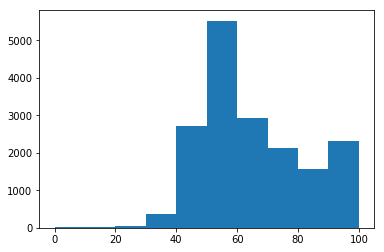

In [58]:
# length = np.arange(all_areas_uk_risk_index.shape[0])

plt.hist(all_areas_uk_risk_index[['risk_index']].to_numpy().flatten())

In [508]:
# !pip install folium 

import folium

regions = uk_regional_data['Area name'].unique()

geo_loc = []

for i in regions:
    
    geolocator = Nominatim(user_agent = "my_geocoder")
    
    location = geolocator.geocode(i)
    
    geo_loc.append([location.latitude, location.longitude])
    

map = folium.Map(location=[38.9, -77.05], zoom_start=12)

for point in range(0, len(geo_loc)):
    
    folium.Marker(geo_loc[point], popup = geo_loc[point]).add_to(map)

map

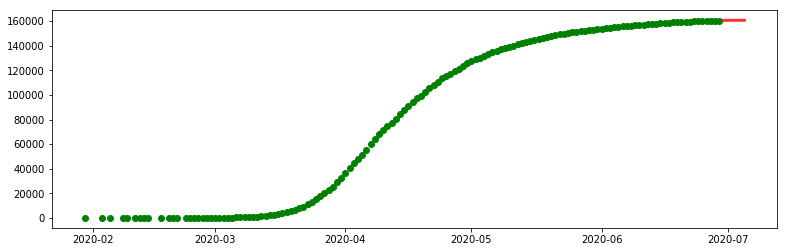

In [362]:
plt.figure(figsize=[13,4])
plt.plot(series.index, series['Cumulative lab-confirmed cases'], 'o', color='g', linewidth=3)
plt.plot(predictions.index, predictions.pred, '-', color=(1,0,0,0.8), linewidth=3)


### Processing France Data




In [61]:
codes_officiel_france = pd.read_csv('/project_data/data_asset/code-officiel-geographique-2019-regions-et-departement (1).csv', sep = ";")

codes_officiel_france.head()


,Code INSEE Département,Code INSEE Région,Code INSEE Chef Lieu Département,Nom Département majuscule,Nom Département,Libellé Département,Code INSEE Chef Lieu Région,Nom Région majuscule,Libellé Région,Nom région
0,10,44,10387,AUBE,Aube,Aube,67482,GRAND EST,Grand Est,Grand Est
1,64,75,64445,PYRENEES ATLANTIQUES,Pyrénées-Atlantiques,Pyrénées-Atlantiques,33063,NOUVELLE AQUITAINE,Nouvelle-Aquitaine,Nouvelle-Aquitaine
2,91,11,91228,ESSONNE,Essonne,Essonne,75056,ILE DE FRANCE,Île-de-France,Île-de-France
3,971,1,97105,GUADELOUPE,Guadeloupe,Guadeloupe,97105,GUADELOUPE,Guadeloupe,Guadeloupe
4,29,53,29232,FINISTERE,Finistère,Finistère,35238,BRETAGNE,Bretagne,Bretagne


In [68]:
## Reading Infections Data

fr_infections_regions = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/ad09241e-52fa-4be8-8298-e5760b43cae2', sep = ";")

fr_infections_regions_agg = fr_infections_regions[['reg', 'jour', 'P']].groupby(['reg', 'jour'])['P'].sum().reset_index()

fr_infections_regions_agg = fr_infections_regions_agg.merge(codes_officiel_france[['Code INSEE Région', 'Nom région']], left_on = 'reg', right_on = 'Code INSEE Région')


In [69]:
fr_infections_regions_agg.rename(columns={'Nom Région': 'area_name', 'Code INSEE Région': 'area_code', 'jour': 'Specimen date'}, inplace = True)

fr_infections_regions_agg.drop('reg', inplace = True, axis =1 )

fr_infections_regions_agg['area_type'] = 'Region'

print("The dataset contains {} duplicates".format(fr_infections_regions_agg.duplicated().sum()))

fr_infections_regions_agg.drop_duplicates(inplace = True)

fr_infections_regions_agg.head()


The dataset contains 5063 duplicates


,Specimen date,P,area_code,Nom région,area_type
0,2020-05-13,0,1,Guadeloupe,Region
1,2020-05-14,0,1,Guadeloupe,Region
2,2020-05-15,0,1,Guadeloupe,Region
3,2020-05-16,0,1,Guadeloupe,Region
4,2020-05-17,0,1,Guadeloupe,Region


In [529]:
fr_infections_dep = pd.read_csv('/project_data/data_asset/donnees-hospitalieres-covid19-2020-06-30-19h00.csv', sep = ';')

fr_infections_dep_agg = fr_infections_dep[['dep', 'jour', 'hosp']].groupby(['dep', 'jour'])['hosp'].sum().reset_index()

fr_infections_dep_agg = fr_infections_dep_agg.merge(codes_officiel_france[['Code INSEE Département', 'Nom Département majuscule']], left_on = 'dep', right_on = 'Code INSEE Département')

fr_infections_dep_agg['Area type'] = 'DEPARTMENT'

print("The dataset contains {} duplicates".format(fr_infections_dep_agg.duplicated().sum()))

fr_infections_dep_agg.drop_duplicates(inplace = True)

fr_infections_dep_agg.head()

The dataset contains 0 duplicates


,dep,jour,hosp,Code INSEE Département,Nom Département majuscule,Area type
0,01,2020-03-18,4,01,AIN,DEPARTMENT
1,01,2020-03-19,4,01,AIN,DEPARTMENT
2,01,2020-03-20,4,01,AIN,DEPARTMENT
3,01,2020-03-21,8,01,AIN,DEPARTMENT
4,01,2020-03-22,16,01,AIN,DEPARTMENT


In [530]:
fr_infections_dep_agg.rename(columns={'Nom Département majuscule': 'Area name', 'Code INSEE Département': 'Area code', 'jour': 'Specimen date'}, inplace = True)

fr_infections_dep_agg.drop('dep', inplace = True, axis =1)

fr_infections_dep_agg.head()

,Specimen date,hosp,Area code,Area name,Area type
0,2020-03-18,4,01,AIN,DEPARTMENT
1,2020-03-19,4,01,AIN,DEPARTMENT
2,2020-03-20,4,01,AIN,DEPARTMENT
3,2020-03-21,8,01,AIN,DEPARTMENT
4,2020-03-22,16,01,AIN,DEPARTMENT


In [531]:
fr_infections_agg = pd.concat([fr_infections_regions_agg, fr_infections_dep_agg], axis =0 )

fr_infections_agg.set_index('Specimen date', inplace=True)

fr_infections_agg.index = pd.to_datetime(fr_infections_agg.index)

fr_infections_agg.head()

,hosp,Area code,Area name,Area type
Specimen date,,,,
2020-03-18,0,1,GUADELOUPE,REGION
2020-03-19,0,1,GUADELOUPE,REGION
2020-03-20,0,1,GUADELOUPE,REGION
2020-03-21,0,1,GUADELOUPE,REGION
2020-03-22,12,1,GUADELOUPE,REGION


In [532]:
fr_infections_agg[(fr_infections_agg['Area name']=='ILE DE FRANCE') & (fr_infections_agg['Area type']=='REGION') ]

,hosp,Area code,Area name,Area type
Specimen date,,,,
2020-03-18,1901,11,ILE DE FRANCE,REGION
2020-03-19,2925,11,ILE DE FRANCE,REGION
2020-03-20,3528,11,ILE DE FRANCE,REGION
2020-03-21,4312,11,ILE DE FRANCE,REGION
2020-03-22,5229,11,ILE DE FRANCE,REGION
2020-03-23,6239,11,ILE DE FRANCE,REGION
2020-03-24,7327,11,ILE DE FRANCE,REGION
2020-03-25,8730,11,ILE DE FRANCE,REGION
2020-03-26,10207,11,ILE DE FRANCE,REGION


In [533]:
## Reading Demographic Data

xls = pd.ExcelFile('/project_data/data_asset/TCRD_021.xls')

fr_regional_pop_data = pd.read_excel(xls, 'REG', skiprows = 3)

fr_regional_pop_data['area_type'] = 'Region'

fr_dep_pop_data = pd.read_excel(xls, 'DEP', skiprows = 3)

fr_dep_pop_data['area_type'] = 'Department'

fr_pop_data = pd.concat([fr_regional_pop_data, fr_dep_pop_data], axis = 0)

fr_pop_data.rename(columns={'Unnamed: 0': 'area_code', 'Unnamed: 1': 'area_name', 'Ensemble': 'All ages', 'Part des 60 ans ou plus (en %)': 'pop_above_65'}, inplace = True)

fr_pop_data = fr_pop_data[['area_code', 'area_name', 'area_type', 'All ages', 'pop_above_65']]

fr_pop_data['area_code'] = fr_pop_data['area_code'].apply(str)

fr_pop_data['area_name'] = fr_pop_data['area_name'].apply(lambda z : z.upper() if isinstance(z, str) else z)

fr_pop_data['area_type'] = fr_pop_data['area_type'].apply(lambda z : z.upper() if isinstance(z, str) else z)

fr_pop_data.head()

,area_code,area_name,area_type,All ages,pop_above_65
0,84,AUVERGNE-RHÔNE-ALPES,REGION,8032377.0,26.3
1,27,BOURGOGNE-FRANCHE-COMTÉ,REGION,2783039.0,30.5
2,53,BRETAGNE,REGION,3340379.0,29.5
3,24,CENTRE-VAL DE LOIRE,REGION,2559073.0,29.6
4,94,CORSE,REGION,344679.0,30.7


In [534]:
fr_pop_data['area_type'].unique()

array(['REGION', 'DEPARTMENT'], dtype=object)

In [535]:
%%time

fr_all_areas_preds = pd.DataFrame()

geo_locate = True

area_types_all = fr_infections_agg['Area type'].unique()

for area_type in area_types_all:
    
    df_area_type = fr_infections_agg[fr_infections_agg['Area type'] == area_type]
    
    fr_area_preds = pd.DataFrame()
        
    area_names_all = df_area_type['Area name'].unique()
    
    for area_name in area_names_all:
        
        print("Generating risk index for: {} - {}".format(area_type, area_name))  
        
        one_preds = generate_predictions_granular(df_area_type, 'hosp', fr_pop_data, 6, 'FRANCE', 'FRA', area_type, area_name, geo_locate)
  
        fr_area_preds = fr_area_preds.append(one_preds)
    
    fr_all_areas_preds = fr_all_areas_preds.append(fr_area_preds)
        
fr_all_areas_preds.head() 


Generating risk index for: REGION - GUADELOUPE
Predicting 6 Days ahead
Series Shape: (104, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - MARTINIQUE
Predicting 6 Days ahead
Series Shape: (104, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - AUVERGNE RHONE ALPES
Predicting 6 Days ahead
Series Shape: (104, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - PROVENCE ALPES COTE D AZUR
Predicting 6 Days ahead
Series

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - AVEYRON
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - BOUCHES DU RHONE
Predicting 6 Days ahead
Series Shape: (105, 4

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - EURE
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - EURE ET LOIR
Predicting 6 Days ahead
Series Shape: (105, 4)
Train

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - JURA
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - LANDES
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - MAYENNE
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - MEURTHE ET MOSELLE
Predicting 6 Days ahead
Series Shape: (105,

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - BAS RHIN
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - HAUT RHIN
Predicting 6 Days ahead
Series Shape: (105, 4)
Trai

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - TARN
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - TARN ET GARONNE
Predicting 6 Days ahead
Series Shape: (105, 4)
Tr

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - VAL D OISE
Predicting 6 Days ahead
Series Shape: (105, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: DEPARTMENT - GUADELOUPE
Predicting 6 Days ahead
Series Shape: (105, 4)
T

In [60]:
fr_all_areas_preds[fr_all_areas_preds['area_name']=='ILE DE FRANCE']

NameError: name 'fr_all_areas_preds' is not defined

In [466]:
series = fr_infections_agg[fr_infections_agg['Area type'] == 'Region']

area_code = str(series[(series['Area name'] == 'ILE DE FRANCE') & (series['Area type'] == 'Region')]['Area code'][0])

area_code

# int(fr_pop_data[(fr_pop_data['area_code']==str(area_code)) & (fr_pop_data['area_type'] == area_type)]['All ages'])*100.00


# fr_pop_data[fr_pop_data['area_code']=='11']

generate_predictions_granular(series, 'hosp', fr_pop_data, 6, 'FRANCE', 'FRA', 'REGION', 'ILE DE FRANCE', True)

# fr_pop_data[fr_pop_data['area_code']==area_code]['All ages']


# fr_pop_data[(fr_pop_data['area_code']==str(area_code)) & (fr_pop_data['area_type'] == 'Region')]


Predicting 6 Days ahead
Series Shape: (0, 4)


In [409]:
 series = df[(df['Area name'] == area_name) & (df['Area type'] == area_type)][columns]

2

## Data For Italy


In [226]:
italy_data_national = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

italy_data_province = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv')

italy_data_regional = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

italy_data_national.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


In [247]:
italy_data_regional[italy_data_regional['denominazione_regione'] == 'Basilicata']


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
22,2020-02-25T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
43,2020-02-26T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
64,2020-02-27T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
85,2020-02-28T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
106,2020-02-29T17:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,32,NaN,NaN
127,2020-03-01T17:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,39,NaN,NaN
148,2020-03-02T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,39,NaN,NaN
169,2020-03-03T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,1,1,1,1,0,0,NaN,NaN,1,42,NaN,NaN
190,2020-03-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,1,1,0,0,0,0,NaN,NaN,1,48,NaN,NaN


In [230]:
italy_data_province.head()


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [232]:
italy_data_province['denominazione_provincia'].unique()

array(["L'Aquila", 'Teramo', 'Pescara', 'Chieti',
       'In fase di definizione/aggiornamento', 'Potenza', 'Matera',
       'Cosenza', 'Catanzaro', 'Reggio di Calabria', 'Crotone',
       'Vibo Valentia', 'Caserta', 'Benevento', 'Napoli', 'Avellino',
       'Salerno', 'Piacenza', 'Parma', "Reggio nell'Emilia", 'Modena',
       'Bologna', 'Ferrara', 'Ravenna', 'Forlì-Cesena', 'Rimini', 'Udine',
       'Gorizia', 'Trieste', 'Pordenone', 'Viterbo', 'Rieti', 'Roma',
       'Latina', 'Frosinone', 'Imperia', 'Savona', 'Genova', 'La Spezia',
       'Varese', 'Como', 'Sondrio', 'Milano', 'Bergamo', 'Brescia',
       'Pavia', 'Cremona', 'Mantova', 'Lecco', 'Lodi',
       'Monza e della Brianza', 'Pesaro e Urbino', 'Ancona', 'Macerata',
       'Ascoli Piceno', 'Fermo', 'Campobasso', 'Isernia', 'Bolzano',
       'Trento', 'Torino', 'Vercelli', 'Novara', 'Cuneo', 'Asti',
       'Alessandria', 'Biella', 'Verbano-Cusio-Ossola', 'Foggia', 'Bari',
       'Taranto', 'Brindisi', 'Lecce', 'Barletta-Andr

In [244]:
italy_data_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [547]:
italy_data_national_preds = italy_data_national[['data', 'stato', 'totale_casi']]

italy_data_national_preds.rename(columns = {'data': 'Specimen date', 'totale_casi': 'hosp'}, inplace = True)

italy_data_national_preds['Specimen date'] = pd.to_datetime(italy_data_national_preds['Specimen date'], format = "%Y-%m-%d")

italy_data_national_preds['Specimen date'] = italy_data_national_preds['Specimen date'].apply(lambda x : dt.datetime.strftime(x,  "%Y-%m-%d"))

italy_data_national_preds['area_code'] = None

italy_data_national_preds['area_name'] = 'ITALY'

italy_data_national_preds['area_type'] = 'COUNTRY'

italy_data_national_preds.drop('stato', inplace = True, axis = 1)

italy_data_national_preds.set_index('Specimen date', inplace = True)


In [548]:
italy_data_national_preds.head()

,hosp,area_code,area_name,area_type
Specimen date,,,,
2020-02-24,229,None,ITALY,COUNTRY
2020-02-25,322,None,ITALY,COUNTRY
2020-02-26,400,None,ITALY,COUNTRY
2020-02-27,650,None,ITALY,COUNTRY
2020-02-28,888,None,ITALY,COUNTRY


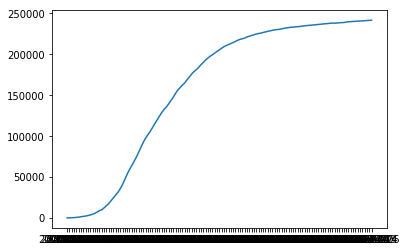

In [250]:
plt.plot(italy_data_national_preds['hosp'])

In [549]:
italy_data_regional_preds = italy_data_regional[['data', 'stato', 'denominazione_regione', 'codice_regione', 'totale_casi']]

italy_data_regional_preds.rename(columns = {'data': 'Specimen date', 'totale_casi': 'hosp', 'denominazione_regione': 'area_name', 'codice_regione': 'area_code'}, inplace = True)

italy_data_regional_preds['Specimen date'] = pd.to_datetime(italy_data_regional_preds['Specimen date'], format = "%Y-%m-%d")

italy_data_regional_preds['Specimen date'] = italy_data_regional_preds['Specimen date'].apply(lambda x : dt.datetime.strftime(x,  "%Y-%m-%d"))

italy_data_regional_preds['area_type'] = 'REGION'

italy_data_regional_preds.drop('stato', inplace = True, axis = 1)

italy_data_regional_preds.set_index('Specimen date', inplace = True)

In [550]:
italy_data_regional_preds.head()

,area_name,area_code,hosp,area_type
Specimen date,,,,
2020-02-24,Abruzzo,13,0,REGION
2020-02-24,Basilicata,17,0,REGION
2020-02-24,Calabria,18,0,REGION
2020-02-24,Campania,15,0,REGION
2020-02-24,Emilia-Romagna,8,18,REGION


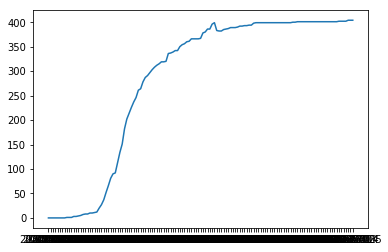

In [254]:
plt.plot(italy_data_regional_preds[italy_data_regional_preds['Area name']=='Basilicata']['hosp'])

In [255]:
italy_data_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [551]:
italy_data_province_preds = italy_data_province[['data', 'denominazione_provincia', 'totale_casi']].groupby(['data', 'denominazione_provincia'])['totale_casi'].sum().reset_index()

italy_data_province_preds.rename(columns = {'data': 'Specimen date', 'totale_casi': 'hosp', 'denominazione_provincia': 'area_name'}, inplace = True)

italy_data_province_preds['Specimen date'] = pd.to_datetime(italy_data_province_preds['Specimen date'], format = "%Y-%m-%d")

italy_data_province_preds['Specimen date'] = italy_data_province_preds['Specimen date'].apply(lambda x : dt.datetime.strftime(x,  "%Y-%m-%d"))

italy_data_province_preds['area_code'] = None

italy_data_province_preds['area_type'] = 'PROVINCE'

italy_data_province_preds.set_index('Specimen date', inplace = True)


In [552]:
italy_data_province_preds.head()

,area_name,hosp,area_code,area_type
Specimen date,,,,
2020-02-24,Agrigento,0,None,PROVINCE
2020-02-24,Alessandria,0,None,PROVINCE
2020-02-24,Ancona,0,None,PROVINCE
2020-02-24,Aosta,0,None,PROVINCE
2020-02-24,Arezzo,0,None,PROVINCE


In [257]:
italy_data_province_preds[italy_data_province_preds['Area name']=='In fase di definizione/aggiornamento']

,Area name,hosp,Area code,Area type
Specimen date,,,,
2020-02-24,In fase di definizione/aggiornamento,0,None,Province
2020-02-25,In fase di definizione/aggiornamento,10,None,Province
2020-02-26,In fase di definizione/aggiornamento,30,None,Province
2020-02-27,In fase di definizione/aggiornamento,25,None,Province
2020-02-28,In fase di definizione/aggiornamento,62,None,Province
2020-02-29,In fase di definizione/aggiornamento,71,None,Province
2020-03-01,In fase di definizione/aggiornamento,117,None,Province
2020-03-02,In fase di definizione/aggiornamento,188,None,Province
2020-03-03,In fase di definizione/aggiornamento,51,None,Province


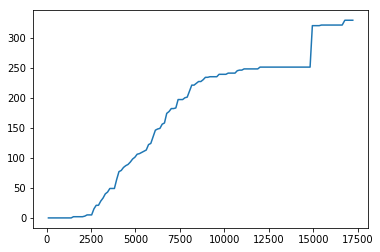

In [260]:
plt.plot(italy_data_province[italy_data_province['denominazione_provincia'] == 'Siracusa']['totale_casi'])

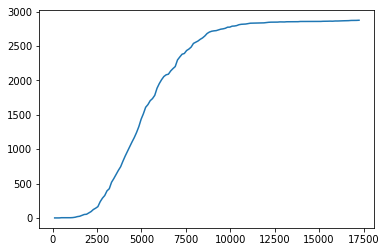

In [262]:
plt.plot(italy_data_province[italy_data_province['denominazione_provincia'] == 'Vicenza']['totale_casi'])

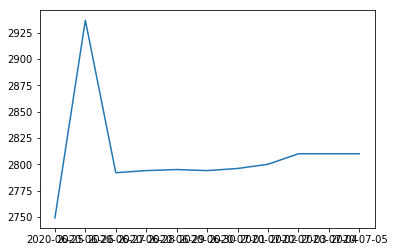

In [263]:
plt.plot(italy_data_province_preds[italy_data_province_preds['Area name']=='Fuori Regione / Provincia Autonoma']['hosp'])

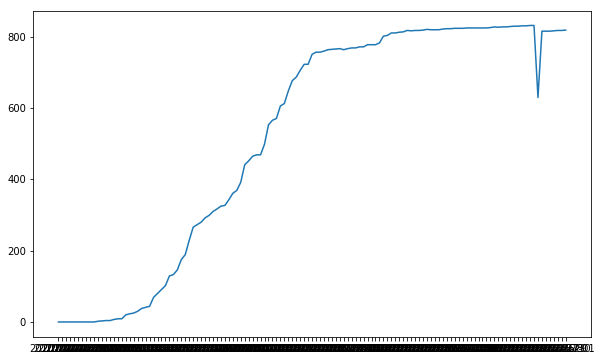

In [1009]:
plt.plot(italy_data_province_preds[italy_data_province_preds['Area name']=='Chieti']['hosp'])

In [610]:
italy_data_all_areas = pd.concat([italy_data_national_preds, italy_data_regional_preds], axis = 0)

print("The dataset contains {} duplicates".format(italy_data_all_areas.duplicated().sum()))

italy_data_all_areas.drop_duplicates(inplace = True)

italy_data_all_areas['area_name'] = italy_data_all_areas['area_name'].apply(lambda z : z.upper())

italy_data_all_areas.head()

The dataset contains 466 duplicates


,area_code,area_name,area_type,hosp
Specimen date,,,,
2020-02-24,None,ITALY,COUNTRY,229
2020-02-25,None,ITALY,COUNTRY,322
2020-02-26,None,ITALY,COUNTRY,400
2020-02-27,None,ITALY,COUNTRY,650
2020-02-28,None,ITALY,COUNTRY,888


In [611]:
italy_data_all_areas['area_name'].unique()

array(['ITALY', 'ABRUZZO', 'BASILICATA', 'CALABRIA', 'CAMPANIA',
       'EMILIA-ROMAGNA', 'FRIULI VENEZIA GIULIA', 'LAZIO', 'LIGURIA',
       'LOMBARDIA', 'MARCHE', 'MOLISE', 'P.A. BOLZANO', 'P.A. TRENTO',
       'PIEMONTE', 'PUGLIA', 'SARDEGNA', 'SICILIA', 'TOSCANA', 'UMBRIA',
       "VALLE D'AOSTA", 'VENETO'], dtype=object)

In [612]:
italy_data_all_areas['area_name'] = italy_data_all_areas['area_name'].apply(lambda x : 'BOLZANO' if x == 'P.A. BOLZANO' else 'TRENTO' if x == 'P.A. TRENTO' else x)

In [613]:
italy_data_all_areas['area_name'].unique()

array(['ITALY', 'ABRUZZO', 'BASILICATA', 'CALABRIA', 'CAMPANIA',
       'EMILIA-ROMAGNA', 'FRIULI VENEZIA GIULIA', 'LAZIO', 'LIGURIA',
       'LOMBARDIA', 'MARCHE', 'MOLISE', 'BOLZANO', 'TRENTO', 'PIEMONTE',
       'PUGLIA', 'SARDEGNA', 'SICILIA', 'TOSCANA', 'UMBRIA',
       "VALLE D'AOSTA", 'VENETO'], dtype=object)

In [638]:
## Reading Demographic Data 

ita_pop_data = pd.read_csv('/project_data/data_asset/DCIS_POPRES1_06072020030435663.csv')

ita_pop_data.head()


,ITTER107,Territory,TIPO_DATO15,Demographic data type,SEXISTAT1,Gender,ETA1,Age,STATCIV2,Marital status,TIME,Select time,Value,Flag Codes,Flags
0,IT,Italy,JAN,population on 1st January,1,males,Y0,0 years,1,never married,2019,2019,225428,p,provisional data
1,IT,Italy,JAN,population on 1st January,1,males,Y0,0 years,99,total,2019,2019,225428,p,provisional data
2,IT,Italy,JAN,population on 1st January,2,females,Y0,0 years,1,never married,2019,2019,212859,p,provisional data
3,IT,Italy,JAN,population on 1st January,2,females,Y0,0 years,99,total,2019,2019,212859,p,provisional data
4,IT,Italy,JAN,population on 1st January,9,total,Y0,0 years,1,never married,2019,2019,438287,p,provisional data


In [639]:
ita_pop_data[ita_pop_data['Territory'] == 'FRIULI VENEZIA GIULIA']

,ITTER107,Territory,TIPO_DATO15,Demographic data type,SEXISTAT1,Gender,ETA1,Age,STATCIV2,Marital status,TIME,Select time,Value,Flag Codes,Flags


In [642]:
ita_pop_data = ita_pop_data[(ita_pop_data['Gender']=='total') & (ita_pop_data['STATCIV2']==99)][['Territory', 'Age', 'Value']].drop_duplicates()

ita_pop_data['All ages'] = ita_pop_data['Value'].groupby(ita_pop_data['Territory']).transform(max)

# sub_data = ita_pop_data[(ita_pop_data['Territory']=='Italy') & (ita_pop_data['SEXISTAT1']==9) & (ita_pop_data['Gender']=='total') & (ita_pop_data['STATCIV2']==99)]

# ita_pop_data['pop_above_65'] = sub_data['Value'].groupby(sub_data['Territory']).tail(10).sum()

ita_pop_data = ita_pop_data[['Territory', 'All ages']].drop_duplicates()

ita_pop_data.rename(columns= {'Territory': 'area_name'}, inplace = True)

ita_pop_data['area_name'] = ita_pop_data['area_name'].apply(lambda z : z.upper())

ita_pop_data.head()

,area_name,All ages
5,ITALY,60359546
11,NORD-OVEST,16093286
17,PIEMONTE,4356406
23,TORINO,2259523
29,VERCELLI,170911


In [635]:
set(italy_data_all_areas['area_name']) & set(ita_pop_data['area_name'])

{'ABRUZZO',
 'BASILICATA',
 'CALABRIA',
 'CAMPANIA',
 'EMILIA-ROMAGNA',
 'ITALY',
 'LAZIO',
 'LIGURIA',
 'LOMBARDIA',
 'MARCHE',
 'MOLISE',
 'PIEMONTE',
 'PUGLIA',
 'SARDEGNA',
 'SICILIA',
 'TOSCANA',
 'TRENTO',
 'UMBRIA',
 'VENETO'}

In [647]:
%%time

geo_locate = True 

ita_all_areas_preds = pd.DataFrame()

area_types_all = italy_data_all_areas['area_type'].unique()

for area_type in area_types_all:
    
    df_area_type = italy_data_all_areas[italy_data_all_areas['area_type'] == area_type]
    
    ita_area_preds = pd.DataFrame()
    
    area_names_all = df_area_type['area_name'].unique()
    
    for area_name in area_names_all:
        
        print("Generating risk index for: {} - {}".format(area_type, area_name))
        
        one_preds = generate_predictions_granular(italy_data_all_areas, 'hosp', ita_pop_data, 6, 'ITALY', 'ITA', area_type, area_name, geo_locate)
        
        ita_area_preds = ita_area_preds.append(one_preds)
    
    ita_all_areas_preds = ita_all_areas_preds.append(ita_area_preds)
        
ita_all_areas_preds.head()  


Generating risk index for: COUNTRY - ITALY
Predicting 6 Days ahead
Series Shape: (133, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Processing Exceptional Case of Italy
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - ABRUZZO
Predicting 6 Days ahead
Series Shape: (116, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Processing Exceptional Case of Italy
-----------------------------

Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Processing Exceptional Case of Italy
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Data
--------------------------------
Generating risk index for: REGION - PIEMONTE
Predicting 6 Days ahead
Series Shape: (130, 4)
Training KF and Predicting hosp, 6 days ahead
--------------------------------
Reading and merging with Stringency and Complementary Data
--------------------------------
Merging with Regional Population Data
--------------------------------
Processing Exceptional Case of Italy
--------------------------------
Extrapolating Stringency Indices and Static Data
--------------------------------
Calculating the Risk Index
--------------------------------
Adding Geolocation Dat

In [649]:
ita_all_areas_preds.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,real_figures,country,area_name,area_type,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,area_population_density,risk_index,risk_index_disc,latitude,longitude
0,2020-03-07,2864.616591,2565.603059,3163.630123,69.486216,855.350877,5883.0,ITALY,ITALY,COUNTRY,74.54,0.094,205.859,11351117.0,60461828.0,-19.0,1.0,2.0,-24.0,-15.0,100.0,100.0,90 - 100,42.638426,12.674297
1,2020-03-08,3838.896209,3587.259383,4090.533034,67.419687,900.570084,7375.0,ITALY,ITALY,COUNTRY,74.54,0.130,205.859,11351117.0,60461828.0,-32.0,3.0,1.0,-27.0,-10.0,100.0,100.0,90 - 100,42.638426,12.674297
2,2020-03-09,4831.366414,4603.998532,5058.734295,64.775549,935.752825,9172.0,ITALY,ITALY,COUNTRY,74.54,0.064,205.859,11351117.0,60461828.0,-30.0,-1.0,-24.0,-42.0,-24.0,100.0,100.0,90 - 100,42.638426,12.674297
3,2020-03-10,5727.420854,5522.104629,5932.737080,64.015407,990.975350,10149.0,ITALY,ITALY,COUNTRY,82.41,0.115,205.859,11351117.0,60461828.0,-43.0,-2.0,-32.0,-51.0,-31.0,100.0,100.0,90 - 100,42.638426,12.674297
4,2020-03-11,6654.300042,6474.592439,6834.007646,66.464956,1087.144473,12462.0,ITALY,ITALY,COUNTRY,85.19,0.205,205.859,11351117.0,60461828.0,-52.0,-14.0,-32.0,-57.0,-37.0,100.0,100.0,90 - 100,42.638426,12.674297


In [1029]:
generate_predictions_granular(italy_data_all_areas, 'hosp', ita_pop_data, 6, 'ITALY', 'ITA', area_type, area_name, geo_locate)

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,country,area_name,area_type,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,area_population_density,risk_index,risk_index_disc,latitude,longitude
117,2020-07-03,19295.475027,19240.214018,19350.736036,0.053353,5.076849,ITALY,Veneto,Region,38.89,NaN,205.859,11325548.0,60461828.0,NaN,NaN,NaN,NaN,NaN,0,56.024969,50 - 70,45.647666,11.866525
118,2020-07-04,19298.015303,19230.615587,19365.415018,0.037783,5.114632,ITALY,Veneto,Region,38.89,NaN,205.859,11325548.0,60461828.0,NaN,NaN,NaN,NaN,NaN,0,56.071506,50 - 70,45.647666,11.866525
119,2020-07-05,19300.569690,19219.091416,19382.047964,0.044731,5.159363,ITALY,Veneto,Region,38.89,NaN,205.859,11325548.0,60461828.0,NaN,NaN,NaN,NaN,NaN,0,56.126589,50 - 70,45.647666,11.866525
120,2020-07-06,19303.139797,19205.579877,19400.699717,0.056018,5.215382,ITALY,Veneto,Region,38.89,NaN,205.859,11325548.0,60461828.0,NaN,NaN,NaN,NaN,NaN,0,56.195548,50 - 70,45.647666,11.866525
121,2020-07-07,19305.727546,19190.030088,19421.425004,0.061370,5.276752,ITALY,Veneto,Region,38.89,NaN,205.859,11325548.0,60461828.0,NaN,NaN,NaN,NaN,NaN,0,56.271068,50 - 70,45.647666,11.866525


In [963]:
italy_data_all_areas[italy_data_all_areas['Area name'] == 'In fase di definizione/aggiornamento']

,Area code,Area name,Area type,hosp
Specimen date,,,,
2020-02-24,None,In fase di definizione/aggiornamento,Province,0
2020-02-25,None,In fase di definizione/aggiornamento,Province,5
2020-02-26,None,In fase di definizione/aggiornamento,Province,9
2020-02-26,None,In fase di definizione/aggiornamento,Province,21
2020-02-27,None,In fase di definizione/aggiornamento,Province,12
2020-02-27,None,In fase di definizione/aggiornamento,Province,13
2020-02-28,None,In fase di definizione/aggiornamento,Province,20
2020-02-28,None,In fase di definizione/aggiornamento,Province,42
2020-02-29,None,In fase di definizione/aggiornamento,Province,18


## Predictions for Germany


In [684]:
data_germany = pd.read_csv("/project_data/data_asset/df_pipeline_germany.csv")

data_germany.head()

,Area name,new cases,cum cases,Area type,Country,Cognos Area name,Cca 2
2020-03-03,"Berlin, Stadt",6,6,Landkreis,Germany,"Berlin, Stadt",11000.0
2020-03-04,"Berlin, Stadt",3,9,Landkreis,Germany,"Berlin, Stadt",11000.0
2020-03-05,"Berlin, Stadt",10,19,Landkreis,Germany,"Berlin, Stadt",11000.0
2020-03-06,"Berlin, Stadt",5,24,Landkreis,Germany,"Berlin, Stadt",11000.0
2020-03-07,"Berlin, Stadt",1,25,Landkreis,Germany,"Berlin, Stadt",11000.0


In [690]:
data_germany.rename(columns = {'Cognos Area name': 'area_name', 'Area type': 'area_type', 'Cca 2': 'area_code'}, inplace = True)

data_germany = data_germany[[ 'area_name', 'area_type', 'cum cases', 'area_code']]

data_germany['area_code'] = data_germany['area_code'].apply(pd.to_numeric, errors='coerce')

data_germany.head()


,area_name,area_type,cum cases,area_code
2020-03-03,"Berlin, Stadt",Landkreis,6,11000.0
2020-03-04,"Berlin, Stadt",Landkreis,9,11000.0
2020-03-05,"Berlin, Stadt",Landkreis,19,11000.0
2020-03-06,"Berlin, Stadt",Landkreis,24,11000.0
2020-03-07,"Berlin, Stadt",Landkreis,25,11000.0


In [695]:
germ_pop_stats.columns

Index(['area_code', ' Name', ' Wert,,'], dtype='object')

In [709]:
germ_pop_stats = pd.read_csv('/project_data/data_asset/regional_population_germany.csv', sep = ";")

germ_pop_stats.rename(columns = {'Schluessel': 'area_code', ' Name': 'area_name', ' Wert,,': 'population_density'}, inplace = True)

germ_pop_stats['population_density'] = germ_pop_stats['population_density'].apply(lambda x: x.replace(',', '')) 

germ_pop_stats['population_density'] = germ_pop_stats['population_density'].apply(pd.to_numeric, errors='coerce')

germ_pop_stats.head()


,area_code,area_name,population_density
0,1001,"Flensburg, Kreisfreie Stadt",1560.4
1,1002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",2089.7
2,1003,"Lübeck, Hansestadt, Kreisfreie Stadt",1009.9
3,1004,"Neumünster, Kreisfreie Stadt",1107.1
4,1051,"Dithmarschen, Landkreis",93.4


area_code               int64
area_name              object
population_density    float64
dtype: object

Index(['Schluessel', ' Name', ' Wert,,'], dtype='object')

In [677]:
germ_pop_stats[' Name'].unique()

array([' Flensburg, Kreisfreie Stadt',
       ' Kiel, Landeshauptstadt, Kreisfreie Stadt',
       ' Lübeck, Hansestadt, Kreisfreie Stadt',
       ' Neumünster, Kreisfreie Stadt', ' Dithmarschen, Landkreis',
       ' Herzogtum Lauenburg, Landkreis', ' Nordfriesland, Landkreis',
       ' Ostholstein, Landkreis', ' Pinneberg, Landkreis',
       ' Plön, Landkreis', ' Rendsburg-Eckernförde, Landkreis',
       ' Schleswig-Flensburg, Landkreis', ' Segeberg, Landkreis',
       ' Steinburg, Landkreis', ' Stormarn, Landkreis', ' Hamburg',
       ' Braunschweig, Kreisfreie Stadt', ' Salzgitter, Kreisfreie Stadt',
       ' Wolfsburg, Kreisfreie Stadt', ' Gifhorn, Landkreis',
       ' Goslar, Landkreis', ' Helmstedt, Landkreis',
       ' Northeim, Landkreis', ' Peine, Landkreis',
       ' Wolfenbüttel, Landkreis', ' Göttingen, Landkreis',
       ' Region Hannover, Landkreis', ' Diepholz, Landkreis',
       ' Hameln-Pyrmont, Landkreis', ' Hildesheim, Landkreis',
       ' Holzminden, Landkreis', ' Ni

### Merging All results in final DataFrame

In [678]:
# all_areas_uk_risk_index.reset_index(inplace = True)

# fr_all_areas_preds.reset_index(inplace = True)

risk_index_world = pd.concat([all_areas_uk_risk_index, fr_all_areas_preds, ita_all_areas_preds], axis = 0)

risk_index_world.shape

(30442, 25)

In [679]:
risk_index_world.head()

,DATE,pred,ci_lower,ci_upper,pred_acc,pred_vel,real_figures,country,area_name,area_type,npi_stringency_index,tests_new_per_thousand,stats_population_density,stats_population_urban,stats_population,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,area_population_density,risk_index,risk_index_disc,latitude,longitude
0,2020-02-21,62.995650,0.0,365.737432,0.472834,7.251256,25.0,ENGLAND,ENGLAND,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,5.0,-1.0,10.0,-3.0,-15.0,100.0,59.368733,50 - 70,52.795479,-0.54024
1,2020-02-23,65.168109,0.0,334.580322,0.299671,5.249337,30.0,ENGLAND,ENGLAND,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,-1.0,-2.0,-5.0,3.0,-1.0,100.0,56.933386,50 - 70,52.795479,-0.54024
2,2020-02-24,61.279396,0.0,294.003753,-0.004992,2.167579,32.0,ENGLAND,ENGLAND,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,-3.0,-1.0,-9.0,-2.0,-2.0,100.0,53.122081,50 - 70,52.795479,-0.54024
3,2020-02-25,53.102194,0.0,258.906320,0.010714,1.771201,36.0,ENGLAND,ENGLAND,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,-1.0,4.0,3.0,1.0,1.0,100.0,52.628252,50 - 70,52.795479,-0.54024
4,2020-02-26,46.270592,0.0,228.838003,-0.039410,1.521862,39.0,ENGLAND,ENGLAND,COUNTRY,11.11,NaN,272.898,18018197.0,67886004.0,1.0,0.0,6.0,-1.0,1.0,100.0,52.317341,50 - 70,52.795479,-0.54024


In [1016]:
all_areas_uk_risk_index.shape

(14216, 24)

In [915]:
fr_all_areas_preds.shape

(11763, 24)

In [1032]:
ita_all_areas_preds.shape

(2266, 24)

(array([ 908.,  470.,  767., 1453., 7023., 8121., 3102., 2070., 1420.,
        2905.]),
 array([6.80895992e-27, 1.00000000e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

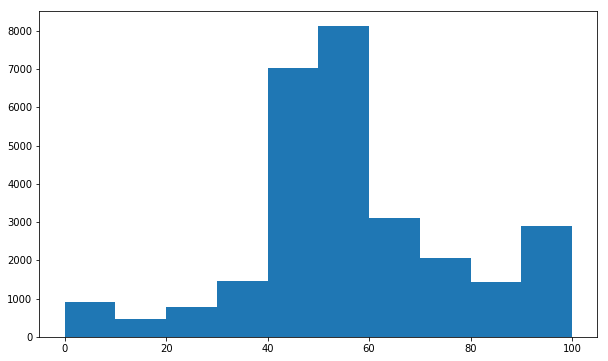

In [1018]:
plt.hist(risk_index_world[['risk_index']].to_numpy().flatten())

In [680]:
## Write Data to CoS

from project_lib import Project

project = Project.access()

project.save_data(file_name = "risk_index_world.csv",data = risk_index_world.to_csv(index = False), overwrite = True)


{'file_name': 'risk_index_world.csv',
 'message': 'File saved to project storage.',
 'asset_id': 'e87f9f71-feab-491a-a289-c38459658d8e'}

In [70]:
from project_lib import Project

project = Project.access()

project.save_data(file_name = "risk_index_uk_only.csv",data = all_areas_uk_risk_index.to_csv(index = False), overwrite = True)


{'file_name': 'risk_index_uk_only.csv',
 'message': 'File saved to project storage.',
 'asset_id': 'b26a4faa-b1c6-4aa1-a642-359e5b3af00b'}